# <center>Trabajo Práctico N°1 : Reservas de Hotel</center>

**Grupo:** N°28 - The Kingdom

**Alumnos**:


*   Jurgens, Cecilia Ines
*   Schipani, Martin Sebastian
*   Soto, Marylin Nicole

**Corrector:** Franco Mastelli

---


# 1. Analisis Exploratorio y Preprocesamiento de Datos

Importamos las librerias correspondientes a utilizar en el proyecto.

In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Cargamos la información a un dataframe de pandas, luego creamos una copia y trabajamos con ella.

In [94]:
ds_hotel_original = pd.read_csv('hotels_train.csv')
df_hotels = ds_hotel_original.copy()

Mostramos las primeras cinco filas del dataset

In [95]:
df_hotels.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   deposit_type  agent company days_in_waiting_list    customer_type    adr  \
0    No Deposit    9.0     NaN                    0        Transient  115.5   
1    No Deposit    NaN     NaN                    0        Transient   42.0   
2    No Deposit    9.0     NaN                    0        Transient  229.0   
3    Non Refund  154.0     NaN                    0        Transient   75.0   
4    No Deposit   20.0     NaN                    0  Transient-Party   75.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          1   
1                            1                          0   
2                            0                          2   
3                            0                          0   
4                            0                          1   

                                     id is_canceled  
0  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  
2  2226c018-ea20-4c4e-8f71-ea66aee70d7c           0  
3  314f56dc-2e4d-4298-9bdd-27bb008bffff           1  
4  28c75445-c603-413a-babf-ad377018b592           0  

[5 rows x 31 columns]

Mostramos las ultimas cinco filas del dataset

In [96]:
df_hotels.tail()

hotel  lead_time  arrival_date_year arrival_date_month  \
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       deposit_type  agent company days_in_waiting_list customer_type     adr  \
61908    No Deposit  240.0     NaN                    0     Transient   48.00   
61909    No Deposit    NaN     NaN                    0     Transient  149.00   
61910    No Deposit    NaN   153.0                    0     Transient   95.00   
61911    Non Refund   96.0     NaN                    0     Transient   36.05   
61912    No Deposit    9.0     NaN                    0     Transient  143.29   

       required_car_parking_spaces  total_of_special_requests  \
61908                            0                          1   
61909                            0                          0   
61910                            0                          0   
61911                            0                          0   
61912                            0                          0   

                                         id is_canceled  
61908  32bffef5-5404-4e86-9f39-fd2282e1ad7f           1  
61909  cc922a1c-356e-42a5-a984-0b1af03c2f5c           0  
61910  76fb0e83-59df-43ee-9c33-aec51030ed45           0  
61911  01906859-1094-4e37-b13e-b015b594d159           1  
61912  7137e599-4442-41fb-b147-4aba9f344e38           1  

[5 rows x 31 columns]

## <u>Análisis del dataset</u>

Muestra la cantidad de filas y columnas que tiene el dataset

In [97]:
print("El dataframe tiene "f"{df_hotels.shape[0]}"" filas y "f"{df_hotels.shape[1]}"" columnas.")

El dataframe tiene 61913 filas y 31 columnas.


Obtengo los nombres de las columnas/categorias del dataset y sus tipos de variables.

In [98]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

###<u>Descripcion de Variables: </u>


1.  **Hotel:** Nombre del hotel
2.  **lead_time:** cantidad de días entre el día de la reserva y el día de llegada.
3.  **arrival_date_year:** año de llegada
4.  **arrival_date_month:** mes de llegada
5.  **arrival_date_week_number:** número de la semana del año de llegada
6.  **arrival_day_of_month:** día del mes de llegada
7.  **stays_in_weekend_nights:** cantidad de noches de fin de semana que estuvo
8.  **stays_in_week_nights:** cantidad de noches de la semana que estuvo.
9.  **adults:** número de adultos en la reserva.
10. **children:** número de niños en la reserva.
11. **babies:** número de bebes en la reserva.
12. **meal:** tipo de comida pedida.
13. **country:** País de origen
14. **market_segment:** categoria de mercado
15. **distrubution_channel:** medio por el cual se hizo la reserva
16. **is_repeated_guest:** si el huesped ya había visitado el hotel.
17. **previous_cancellations:** cantidad de reservas previas canceladas
18. **previous_bookings_not_canceled:** cantidad de reservas previas no canceladas
19. **reserved_room_type:** tipo de cuarto reservado
20. **assigned_room_type:** tipo de cuarto asignado
21. **booking_changes:** cantidad de cambios en la reserrva hasta el día de la llegada
22. **deposit_type:** tipo de depósito de la reserva
23. **agent:** id de la agencia de viaje que se hizo la reserva
24. **company:** id de la compañia que hizo la reserva
25. **days_in_waiting_list:** cantidad de días en la lista de espera.
26. **customer_type:** tipo de cliente
27. **adr:** promedio de ganancia diaria por habitacion.
28. **required_car_parking_spaces:** cantidad de lugares de estacionamiento pedidos.
29. **total_of_special_requests:** cantidad de pedidos especiales
30. **id:** id de la reserva
31. **is_canceled:** si la reserva fue cancelada o no.





###<u>Variables Cuantitativas: </u>

A) Continuas:

- adr

B) Discretas:
- lead_time
- stays_in_weekend_nights
- stays_in_week_nights
- adults
- children
- babies
- previous_cancellations
- previous_bookings_not_canceled
- booking_changes
- days_in_waiting_list
- required_car_parking_spaces
- total_of_special_request


###<u>Variables Cualitativas Nominales:</u>

- hotel
- arrival_date_year
- arrival_date_month
- arrival_date_week_number
- arrival_date_day_of_month
- meal
- country
- market_segment
- distribution_channel
- is_repeated_guest
- reserved_room_type
- assigned_room_type
- deposit_type
- agent
- company
- customer_type
- id
- is_canceled


Chequeamos si existe alguna fila duplicada:

In [99]:
df_hotels[df_hotels.duplicated(keep=False)]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, id, is_canceled]
Index: []

[0 rows x 31 columns]

No hay ninguna fila duplicada. Si hubiera existido, se habria eliminado del dataset.

####<u>Variables Nulos: </u>

Listar la cantidad de datos nulos por columna:

In [100]:
df_hotels.isna().sum()


hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Listar la cantidad de datos no nulos:

In [101]:
df_hotels.count()

hotel                             61913
lead_time                         61913
arrival_date_year                 61913
arrival_date_month                61913
arrival_date_week_number          61913
arrival_date_day_of_month         61913
stays_in_weekend_nights           61913
stays_in_week_nights              61913
adults                            61913
children                          61909
babies                            61913
meal                              61913
country                           61692
market_segment                    61913
distribution_channel              61913
is_repeated_guest                 61913
previous_cancellations            61913
previous_bookings_not_canceled    61913
reserved_room_type                61913
assigned_room_type                61913
booking_changes                   61913
deposit_type                      61913
agent                             54023
company                            3152
days_in_waiting_list              61913


Analizo el porcentaje de valores nulos en el dataset:

In [102]:
df_hotels.isna().sum()/df_hotels.shape[0]*100

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

## <u>Analisis Univariado:</u>

###<u>Variables Cualitativas:</u>

#### hotel:

##### Analisis Estadistico:

In [103]:
df_hotels.hotel.value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Hay dos posibles hoteles para sus reservas: City Hotel y Resort Hotel.

In [104]:
df_hotels.hotel.describe()

count          61913
unique             2
top       City Hotel
freq           42129
Name: hotel, dtype: object

##### Valores Faltantes:

In [105]:
df_hotels.hotel.isna().sum()

0

No hay valores nulos en el dataset sobre hotel.

##### Graficos:

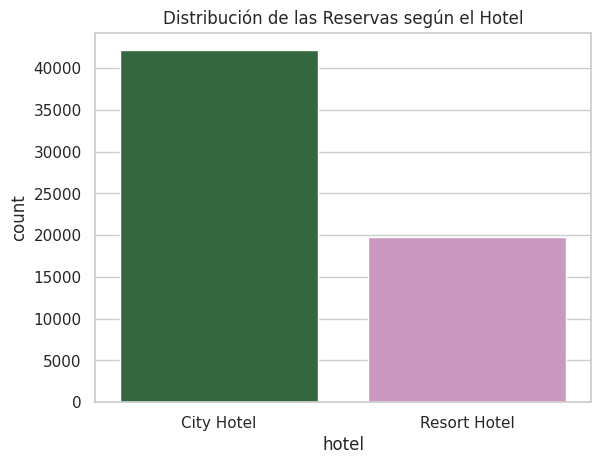

In [106]:
sns.countplot(x='hotel', data = df_hotels, palette="cubehelix").set(title="Distribución de las Reservas según el Hotel")
sns.set_theme(style="whitegrid")
plt.show()

Como se observa, el city hotel tiene una cantidad mayor de reservas al respecto del resort hotel.

##### Analisis con el target:

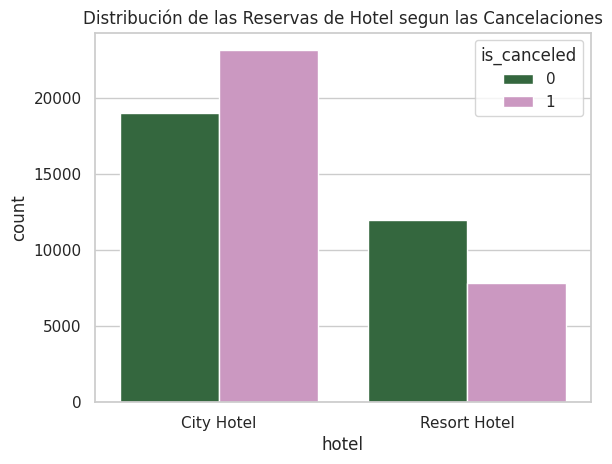

In [107]:
sns.countplot(data=df_hotels, x='hotel', hue='is_canceled', palette = "cubehelix").set(title="Distribución de las Reservas de Hotel segun las Cancelaciones")
sns.set_theme(style="whitegrid")
plt.show()

El city hotel tiene una mayor cantidad de reservas canceladas. En cambio en Resort hotel, sucede lo contrario.

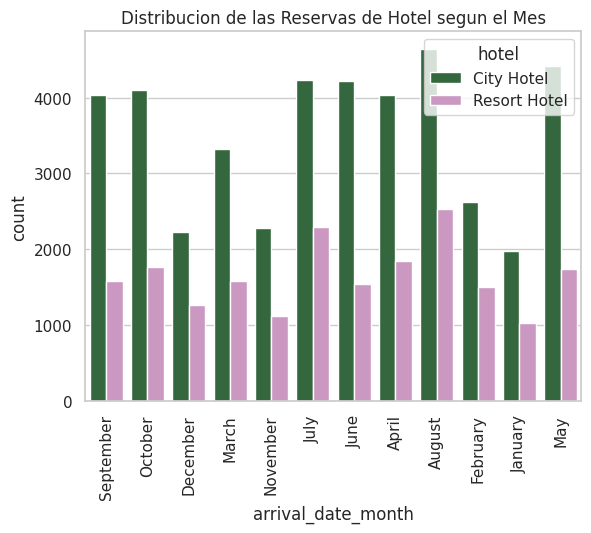

In [108]:
sns.countplot(data=df_hotels, x='arrival_date_month', hue='hotel', palette="cubehelix").set(title="Distribucion de las Reservas de Hotel segun el Mes")
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
plt.show()

#### Arrival_date_year

##### Analisis Estadistico:

Veamos informacion de la variables:

In [109]:
df_hotels.arrival_date_year.value_counts()

2016    29362
2017    21066
2015    11485
Name: arrival_date_year, dtype: int64

Los datos del dataset muestran que las reservas fueron hechas entre el 2015 y 2017

In [110]:
df_hotels.arrival_date_year.describe()

count    61913.000000
mean      2016.154749
std          0.708389
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: arrival_date_year, dtype: float64

##### Valores Faltantes:

In [111]:
df_hotels.arrival_date_year.isna().sum()

0

No hay valores nulos en el dataset sobre esta variable

##### Graficos:

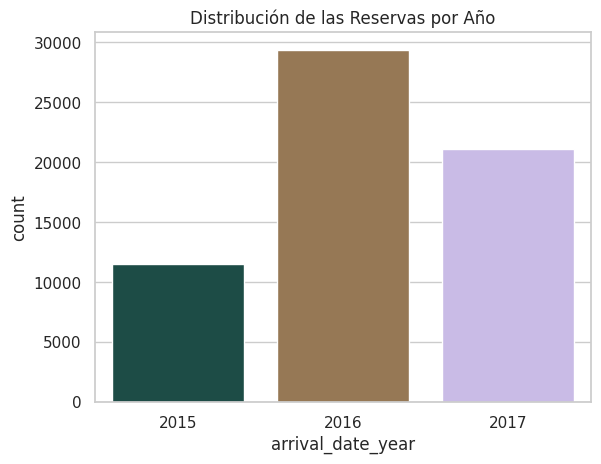

In [112]:
sns.countplot(x='arrival_date_year', data = df_hotels, palette="cubehelix").set(title="Distribución de las Reservas por Año")
sns.set_theme(style="whitegrid")
plt.show()

La mayor cantidad de reservas fueron hechas durante el 2016 y seguido por el 2017.

##### Comparacion con el Target:

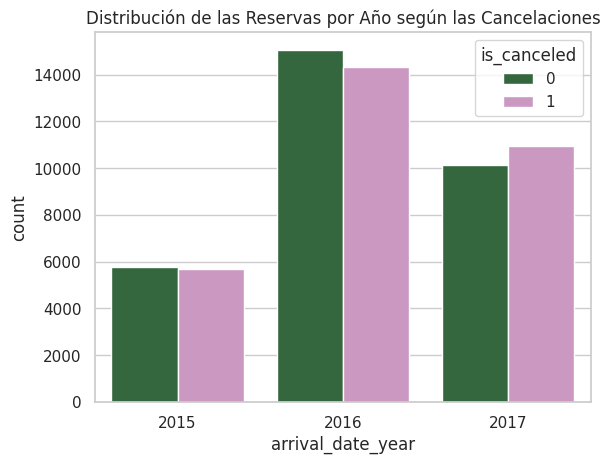

In [113]:
sns.countplot(data=df_hotels, x='arrival_date_year', hue='is_canceled', palette="cubehelix").set(title="Distribución de las Reservas por Año según las Cancelaciones")
sns.set_theme(style="whitegrid")
plt.show()

En el año 2015 y 2016, la mayoria de las reservas no fueron canceladas pero en el año 2017 se revirtio esa situacion y las reservas canceladas fueron mayoritarias.

#### arrival_date_month

##### Analisis Estadistico:

In [114]:
df_hotels.arrival_date_month.value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

In [115]:
df_hotels.arrival_date_month.describe()

count      61913
unique        12
top       August
freq        7176
Name: arrival_date_month, dtype: object

##### Valores nulos:

In [116]:
df_hotels.arrival_date_month.isna().sum()

0

No hay valores nulos en el dataset sobre esta variable.

##### Graficos:

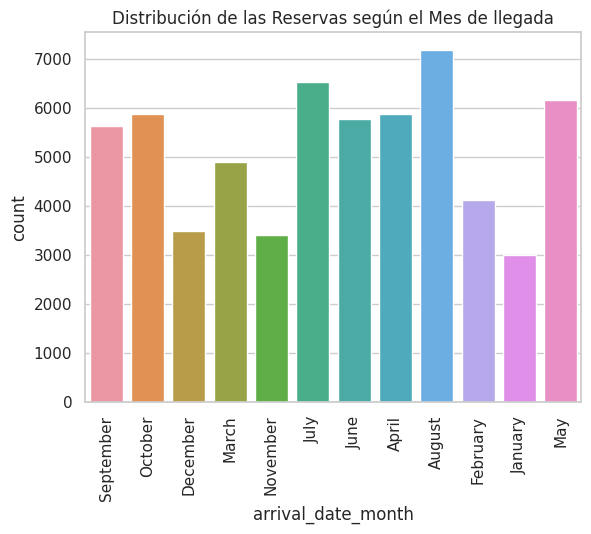

In [117]:
sns.countplot(x='arrival_date_month', data = df_hotels).set(title="Distribución de las Reservas según el Mes de llegada")
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
plt.show()

Según el gráfico, se puede analizar que en julio y agosto son los meses con mayor cantidad de reservas.

##### Comparacion con el Target:

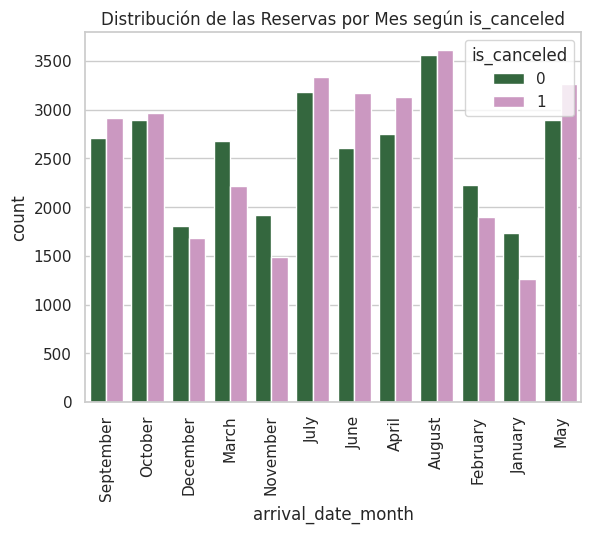

In [118]:
sns.countplot(data=df_hotels, x='arrival_date_month', hue='is_canceled', palette="cubehelix").set(title="Distribución de las Reservas por Mes según is_canceled")
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
plt.show()

Según el gráfico, se puede analizar que en julio y agosto son los meses con mayor cantidad de reservas. A su vez, el gráfico nos indica que las cancelaciones en esos meses son mayores a las reservas que no se cancelan.

#### arrival_date_week_number

##### Analisis Estadistico

In [119]:
df_hotels.arrival_date_week_number.value_counts()

33    1876
18    1611
30    1609
32    1600
17    1547
34    1533
28    1490
21    1467
20    1464
38    1456
42    1449
41    1449
29    1424
25    1412
31    1397
15    1385
22    1370
39    1368
23    1362
27    1359
24    1354
35    1305
40    1271
13    1257
16    1250
26    1232
43    1224
19    1196
14    1189
44    1170
8     1170
37    1166
36    1166
10    1085
9     1082
7     1073
45    1037
11    1028
12     995
53     969
49     915
46     837
47     788
50     781
6      735
4      733
48     721
3      668
5      655
2      642
52     575
1      552
51     464
Name: arrival_date_week_number, dtype: int64

In [120]:
df_hotels.arrival_date_week_number.describe()

count    61913.00000
mean        27.21808
std         13.52601
min          1.00000
25%         16.00000
50%         28.00000
75%         38.00000
max         53.00000
Name: arrival_date_week_number, dtype: float64

In [121]:
print("El numero de la semana del año maximo es" , df_hotels.arrival_date_week_number.max())
print("El numero de la semana del año minimo es" ,df_hotels.arrival_date_week_number.min())

El numero de la semana del año maximo es 53
El numero de la semana del año minimo es 1


Los valores están entre los esperados de las semanas de un año.

##### Valores Faltantes:

In [122]:
df_hotels.arrival_date_week_number.isna().sum()

0

No hay valores nulos para esta variable en el dataset.

##### Graficos:

[Text(0.5, 1.0, 'Distribucion de Reservas por Semana del Año')]

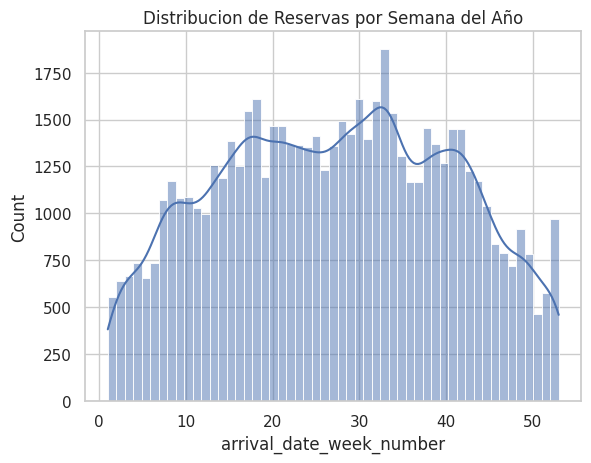

In [123]:
sns.histplot(data = df_hotels, x ='arrival_date_week_number', bins = 53, kde = True).set(title="Distribucion de Reservas por Semana del Año")

La mayor cantidad de reservas se dan en la semana 33.

##### Comparacion con el Target:

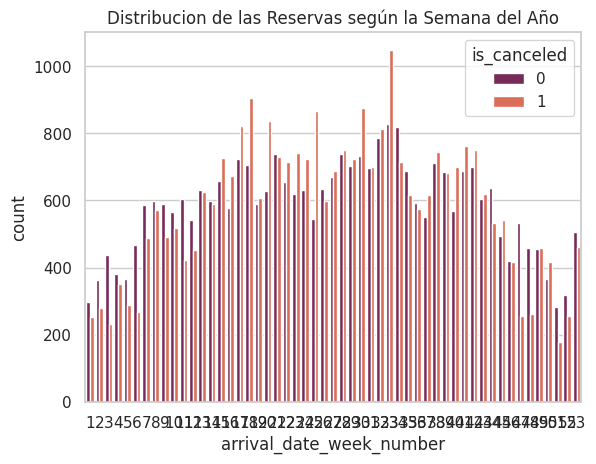

<Figure size 1200x600 with 0 Axes>

In [124]:
sns.countplot(x='arrival_date_week_number', data = df_hotels, hue="is_canceled", palette="rocket").set(title="Distribucion de las Reservas según la Semana del Año")
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
plt.show()

#### arrival_date_day_of_month


##### Analisis Estadistico

In [125]:
df_hotels.arrival_date_day_of_month.value_counts()

17    2305
5     2274
15    2196
16    2182
9     2168
26    2151
12    2123
25    2110
28    2082
2     2078
20    2078
19    2075
24    2070
8     2057
3     2036
30    2033
18    2025
27    2015
14    2008
6     1965
7     1951
4     1939
1     1907
13    1902
21    1898
22    1883
29    1848
23    1842
10    1812
11    1773
31    1127
Name: arrival_date_day_of_month, dtype: int64

In [126]:
df_hotels.arrival_date_day_of_month.describe()

count    61913.000000
mean        15.785812
std          8.795489
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

In [127]:
print("El día del mes máximo es" , df_hotels.arrival_date_day_of_month.max())
print("El día del mes minimo es" , df_hotels.arrival_date_day_of_month.min())

El día del mes máximo es 31
El día del mes minimo es 1


Los valores máximos y míninos esta en los valores esperables.

##### Valores Faltantes:

In [128]:
df_hotels.arrival_date_day_of_month.isna().sum()

0

No hay valores nulos de esta variable en el dataset.

##### Graficos

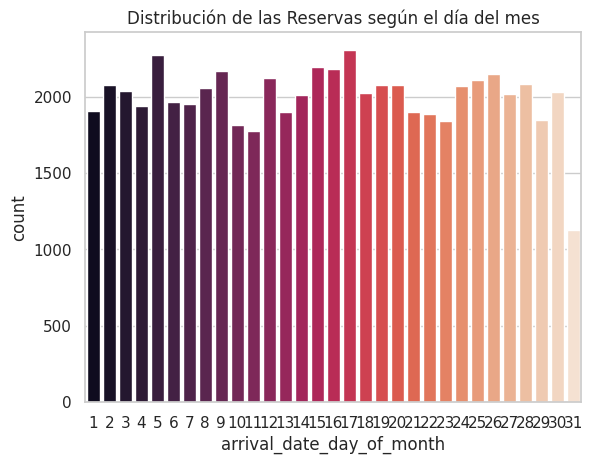

In [129]:
sns.countplot(x='arrival_date_day_of_month', data = df_hotels, palette="rocket", saturation = 0.8).set(title="Distribución de las Reservas según el día del mes")
plt.show()

El dia 5 y 17 son los días que más reservas hay en el dataset.

##### Comparacion con el Target

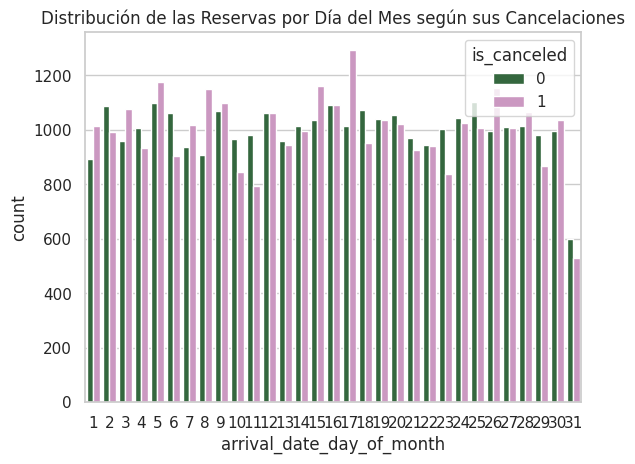

In [130]:
sns.countplot(x='arrival_date_day_of_month', data = df_hotels, palette="cubehelix", hue='is_canceled').set(title="Distribución de las Reservas por Día del Mes según sus Cancelaciones")
sns.set_theme(style="whitegrid")
plt.show()

En el día 17 del mes, sucede dos cosas: es el día de mayor reservas pero a su vez, también es el día de mayor cancelaciones.

#### meal

##### Analisis Estadistico

In [131]:
df_hotels.meal.value_counts()

BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

La variable meal puede tomar estos valores:

+ FB = Desayuno, almuerzo y cena
+ BB = Solamente desayuno
+ HB = desayuno y almuerzo o cena
+ SC/Undefined = Sin paquete de comidas

In [133]:
df_hotels.meal.describe()

count     61913
unique        5
top          BB
freq      47837
Name: meal, dtype: object

##### Valores Faltantes:

In [134]:
df_hotels.meal.isna().sum()

0

No hay valores nulos en esta variable en el dataset.

##### Graficos:

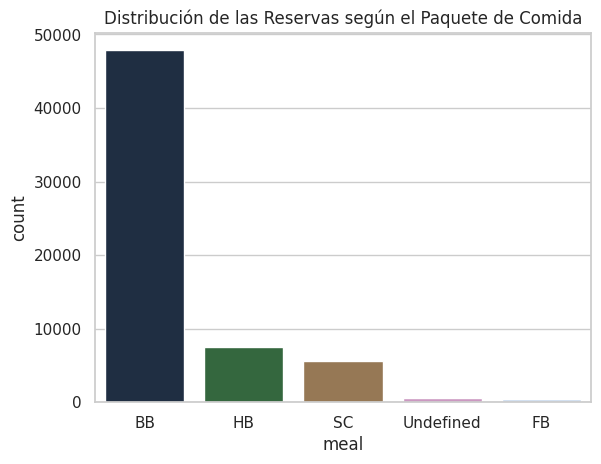

In [135]:
sns.countplot(x='meal', data = df_hotels, palette="cubehelix").set(title="Distribución de las Reservas según el Paquete de Comida")
sns.set_theme(style="whitegrid")
plt.show()

La mayoria de las reservas piden:  el paquete de desayuno y una comida (BB). En cambio, el paquete de desayuno, almuerzo y cena (FB) tiene la menor cantidad de reservas.

##### Comparacion con el Target:

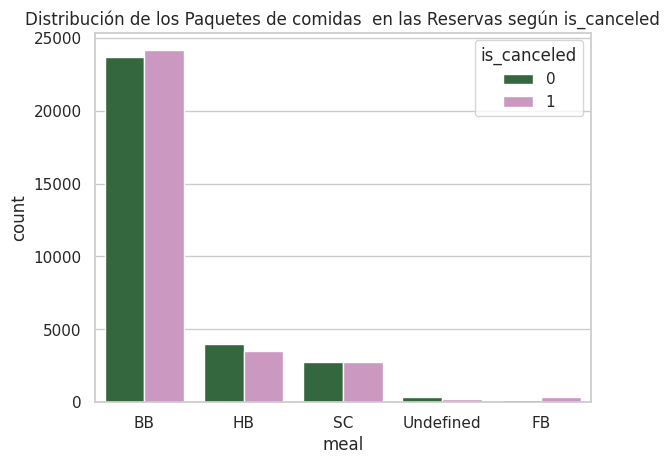

In [136]:
sns.countplot(x='meal', data = df_hotels, palette="cubehelix", hue= 'is_canceled').set(title="Distribución de los Paquetes de comidas  en las Reservas según is_canceled")
plt.show()

El paquete de comidas BB tiene la mayor proporción de reservas pero a su también tiene la mayor proporción de cancelaciones. En los otros paquetes, las cancelaciones están en menor proporción.

#### Country

##### Analisis Estadistico

In [137]:
df_hotels.country.value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

##### valores faltantes:



In [138]:
df_hotels.country.isna().sum()

221

Existen 221 valores nulos de la variable en el dataset. Analizemos el porcentaje de ellos.

In [139]:
(df_hotels.country.isna().sum()*100)/df_hotels.shape[0]

0.3569524978599002

Son pocos los valores nulos en comparacion de todos los registros. Completamos en esos campos nulos, No country

In [140]:
df_hotels.fillna({'country':-1}, inplace = True)
df_hotels.replace({-1, "PRT"})

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       deposit_type  agent company days_in_waiting_list    customer_type  \
0        No Deposit    9.0     NaN                    0        Transient   
1        No Deposit    NaN     NaN                    0        Transient   
2        No Deposit    9.0     NaN                    0        Transient   
3        Non Refund  154.0     NaN                    0        Transient   
4        No Deposit   20.0     NaN                    0  Transient-Party   
...             ...    ...     ...                  ...              ...   
61908    No Deposit  240.0     NaN                    0        Transient   
61909    No Deposit    NaN     NaN                    0        Transient   
61910    No Deposit    NaN   153.0                    0        Transient   
61911    Non Refund   96.0     NaN                    0        Transient   
61912    No Deposit    9.0     NaN                    0        Transient   

          adr  required_car_parking_spaces  total_of_special_requests  \
0      115.50                            0                          1   
1       42.00                            1                          0   
2      229.00                            0                          2   
3       75.00                            0                          0   
4       75.00                            0                          1   
...       ...                          ...                        ...   
61908   48.00                  

##### Graficos

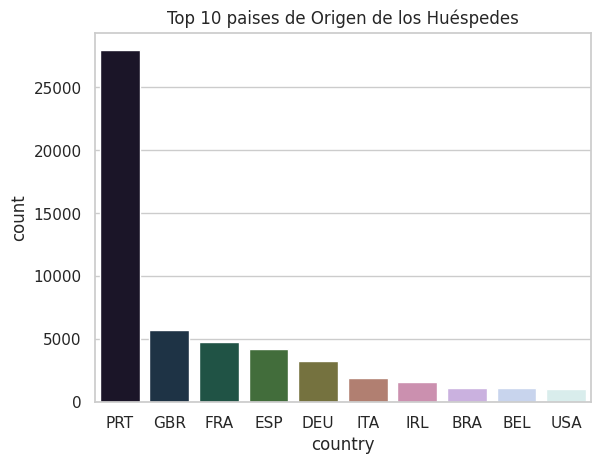

In [141]:
top_countries = df_hotels.country.value_counts().nlargest(10)
sns.countplot(x='country', data = df_hotels, order = top_countries.index, palette = "cubehelix").set(title="Top 10 paises de Origen de los Huéspedes")
sns.set_theme(style="whitegrid")
plt.show()

Según los datos, la mayor cantidad de huespedes provienen de portugal.

##### Comparacion con el target:

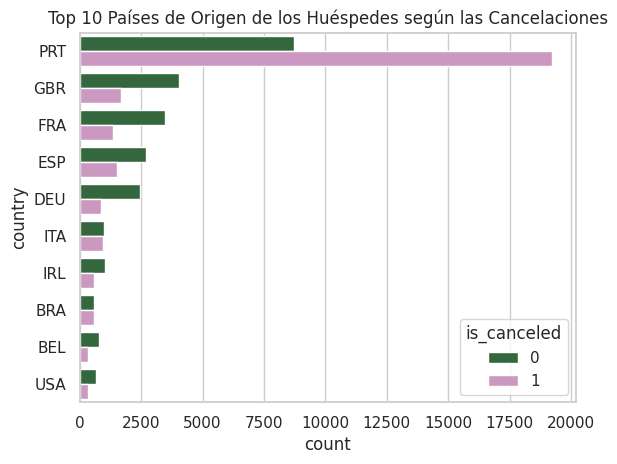

In [142]:
sns.countplot(y='country', data = df_hotels, order = top_countries.index, palette = "cubehelix", hue = 'is_canceled').set(title="Top 10 Países de Origen de los Huéspedes según las Cancelaciones")
sns.set_theme(style="whitegrid")
plt.show()

El país de origen con mayor reservas es Portugal pero, como ha sucedido en otras variables, las cancelaciones son mucho mayores a las reservas que se llevan a cabo.

#### Market_segment

##### Analisis Estadistico

In [143]:
df_hotels.market_segment.value_counts()

Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

El segmento de mercado se divide en diferentes categorias:
+ Online Travel Agent (TA)
+ Offline Travel Agent/Travel Operator (TA/TO)
+ Groups
+ Direct
+ Corporate
+ Complementary
+ Aviation
+ Undefined

##### Valores faltantes:

In [144]:
df_hotels.market_segment.isna().sum()

0

No hay valores nulos en esta variable del dataset.

##### Graficos:

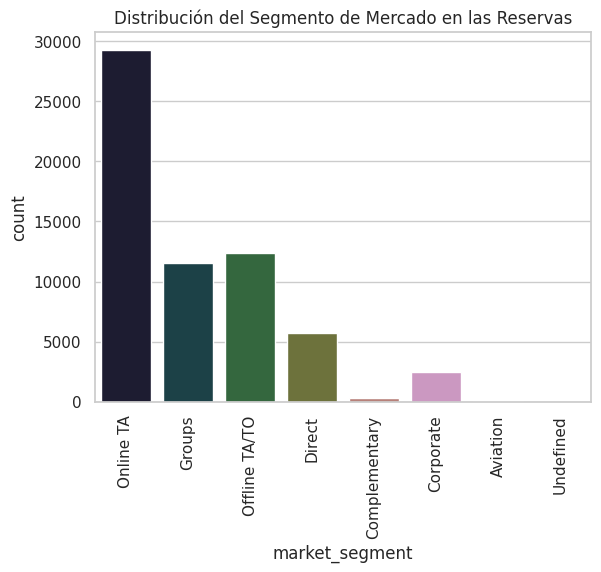

In [145]:
sns.countplot(x='market_segment', data = df_hotels, palette="cubehelix").set(title="Distribución del Segmento de Mercado en las Reservas")
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
plt.show()

La mayor cantidad de reservas se realiza de manera online.

##### Comparacion con el Target:

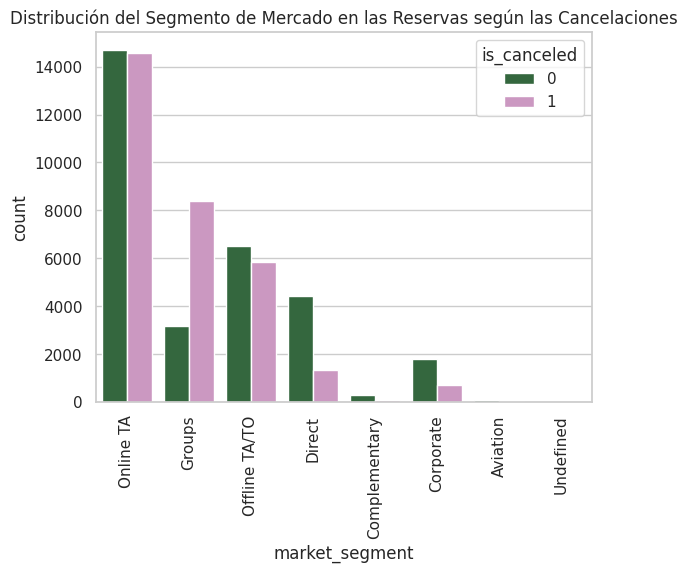

In [146]:
sns.countplot(x='market_segment', data = df_hotels, palette="cubehelix", hue= 'is_canceled').set(title="Distribución del Segmento de Mercado en las Reservas según las Cancelaciones")
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
plt.show()

Las reservas hechas mediante grupos son mayormente canceladas. Aparte las reservas hechas de manera online tiene la misma proporcion de cancelaciones y no cancelaciones.  

#### Distribution_channel

##### Analisis Estadistico

In [147]:
df_hotels.distribution_channel.value_counts()

TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

Las categorias de distribution channel son:
+ Travel Agents/Tour Operators (TA/TO)
+ Direct
+ Corporate
+ GDS
+ Undefined

##### Valores faltantes:

In [148]:
df_hotels.distribution_channel.isna().sum()

0

No hay valores nulos de esta variable en el dataset.

##### Graficos:

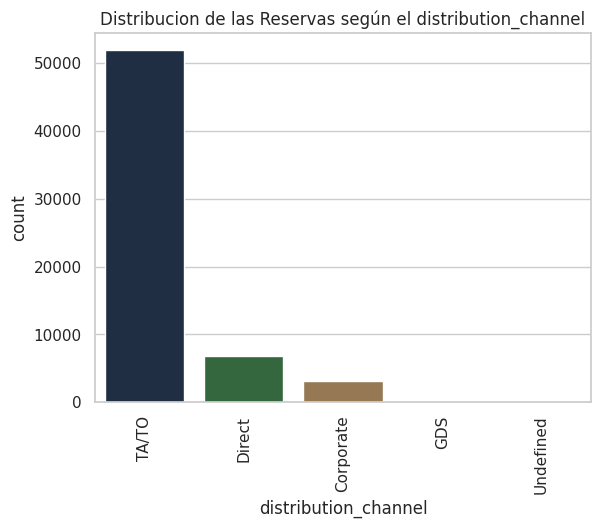

In [149]:
sns.countplot(x='distribution_channel', data = df_hotels, palette="cubehelix").set(title="Distribucion de las Reservas según el distribution_channel")
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
plt.show()

La mayor cantidad de reservas son realizadas a traves de agentes de viaje (TA) u operadores de tours (TO).

##### Comparacion con el target

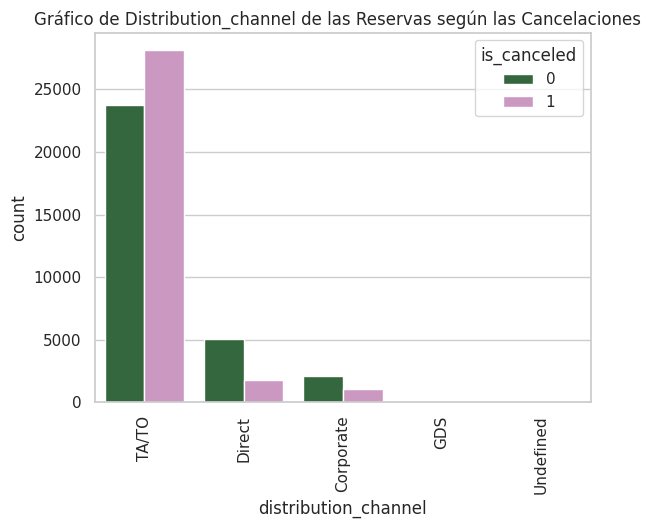

In [150]:
sns.countplot(x='distribution_channel', data = df_hotels, palette="cubehelix", hue='is_canceled').set(title="Gráfico de Distribution_channel de las Reservas según las Cancelaciones  ")
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
plt.show()

La mayor cantidad de reservas se realizan por agentes de viajes pero las cancelaciones son mayores a través de este canal de distribución.

#### is_repeated_guest

##### Analisis Estadistico:

In [151]:
df_hotels.is_repeated_guest.value_counts()

0    60180
1     1733
Name: is_repeated_guest, dtype: int64

##### Valores Faltantes

In [152]:
df_hotels.is_repeated_guest.isna().sum()

0

No hay valores nulos de esta variable en el dataset.

##### Graficos

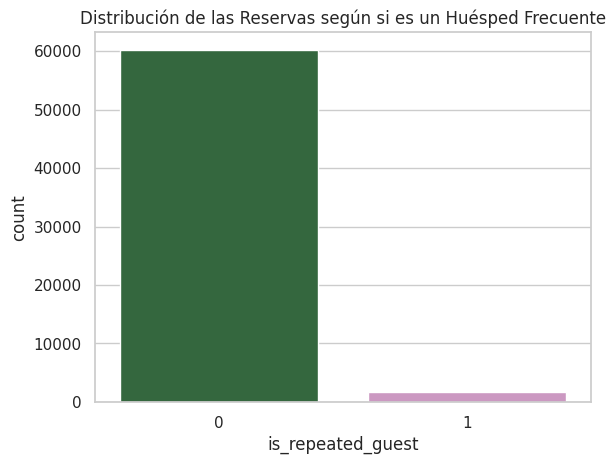

In [153]:
sns.countplot(x='is_repeated_guest', data = df_hotels, palette="cubehelix").set(title="Distribución de las Reservas según si es un Huésped Frecuente")
sns.set_theme(style="whitegrid")
plt.show()

Como el gráfico indica, la mayor cantidad de reservas son hechas por huéspedes nuevos. En cambio, la cantidad de reservas hechas por huéspedes frecuentes es muy baja.

##### Comparacion con el target

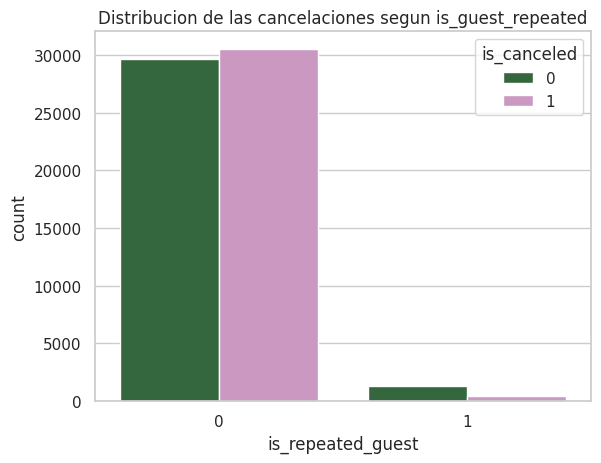

In [154]:
sns.countplot(x='is_repeated_guest', data = df_hotels, palette="cubehelix", hue = "is_canceled").set(title="Distribucion de las cancelaciones segun is_guest_repeated")
sns.set_theme(style="whitegrid")
plt.show()

Los huésped nuevos tienen más tendencia a cancelar la reserva que un huésped frecuente.

#### reserved_room_type

##### Analisis Estadistico

In [155]:
df_hotels.reserved_room_type.value_counts()

A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64

##### Valores Faltantes

In [156]:
df_hotels.reserved_room_type.isna().sum()

0

No hay valores nulos de esta variable en el dataset.

##### Graficos:

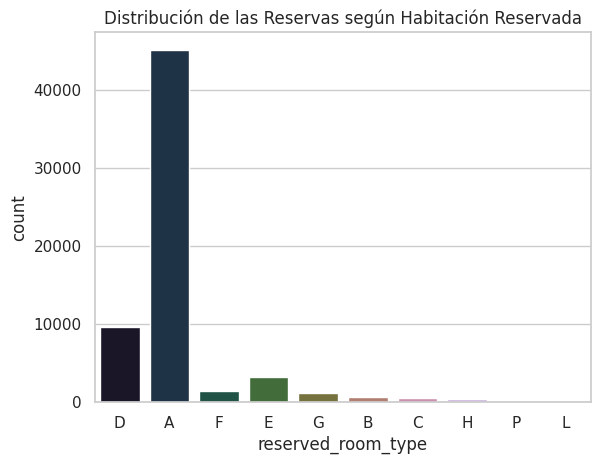

In [157]:
sns.countplot(x='reserved_room_type', data = df_hotels, palette="cubehelix").set(title="Distribución de las Reservas según Habitación Reservada")
sns.set_theme(style="whitegrid")
plt.show()

La habitación A tiene la mayor cantidad de reservas.

##### Comparacion con el target:

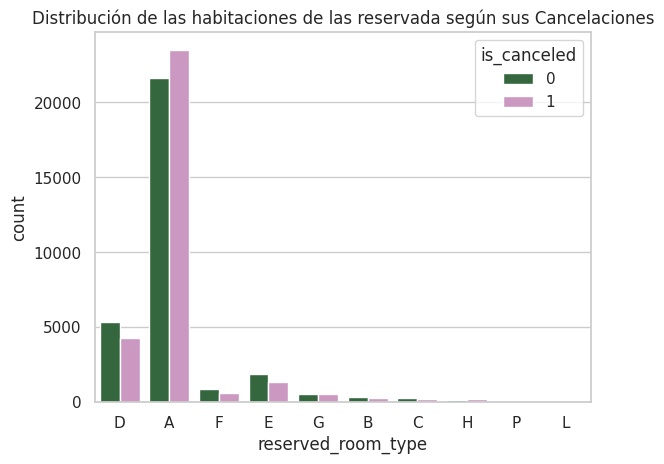

In [158]:
sns.countplot(x='reserved_room_type', data = df_hotels, palette="cubehelix", hue='is_canceled').set(title="Distribución de las habitaciones de las reservada según sus Cancelaciones")
sns.set_theme(style="whitegrid")
plt.show()

La habitación A reservada tiene mayor cantidad de cancelaciones en comparación de las otras habitaciones.

#### assigned_room_type

##### Analisis Estadistico

In [159]:
df_hotels.assigned_room_type.value_counts()

A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64

In [160]:
df_hotels.assigned_room_type.describe()

count     61913
unique       12
top           A
freq      40007
Name: assigned_room_type, dtype: object

##### Valores Faltantes

In [161]:
df_hotels.assigned_room_type.isna().sum()

0

No hay valores nulos de esta variable en el dataset.

##### Graficos

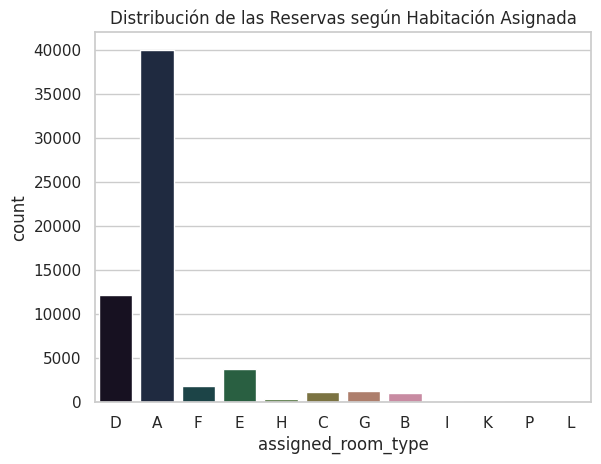

In [162]:
sns.countplot(x='assigned_room_type', data = df_hotels, palette="cubehelix").set(title="Distribución de las Reservas según Habitación Asignada")
sns.set_theme(style="whitegrid")
plt.show()

La habitacion asignada con mayor cantidad de reservas es la A.

##### Comparacion con el target:

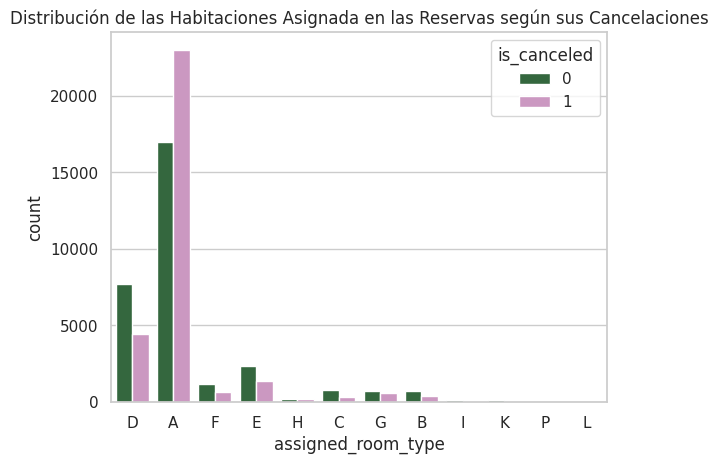

In [163]:
sns.countplot(x='assigned_room_type', data = df_hotels, palette="cubehelix", hue = 'is_canceled').set(title="Distribución de las Habitaciones Asignada en las Reservas según sus Cancelaciones")
sns.set_theme(style="whitegrid")
plt.show()

La habiatcion A tiene mayor cantidad de resrrvas pero, al mismo tiempo, tiene la mayor cantidad de cancelaciones.

#### deposit_type

##### Analisis Estadistico

In [164]:
df_hotels.deposit_type.value_counts()

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

Los distintos depositos son:
+ Sin deposito
+ No reintegrable
+ Reintegrable

##### Variables Faltantes:

In [165]:
df_hotels.deposit_type.isna().sum()

0

##### Graficos

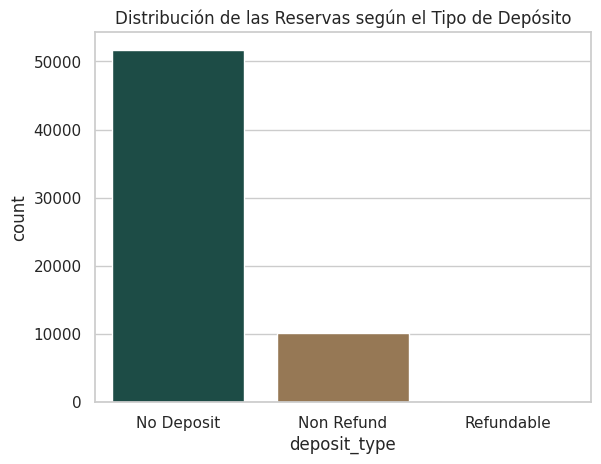

In [166]:
sns.countplot(x='deposit_type', data = df_hotels, palette="cubehelix").set(title="Distribución de las Reservas según el Tipo de Depósito")
sns.set_theme(style="whitegrid")
plt.show()

La mayoria de las reservas se realizan sin depósito, seguido por depósito no reintegrable.

##### Comparacion con el Target:

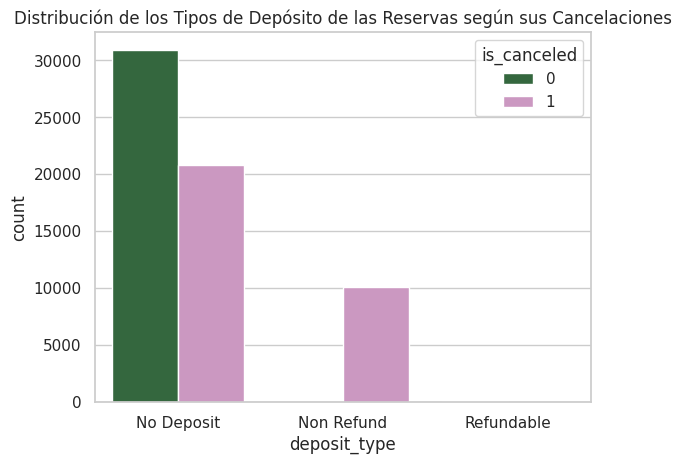

In [167]:
sns.countplot(x='deposit_type', data = df_hotels, palette="cubehelix", hue = 'is_canceled').set(title="Distribución de los Tipos de Depósito de las Reservas según sus Cancelaciones")
sns.set_theme(style="whitegrid")
plt.show()

La mayoria de los reservas hechas sin depósito no son canceladas. En cambio las reservas con depósito  no reintegrables tienen mayor cancelaciones.

#### agent

##### Analisis Estadistico:

In [168]:
df_hotels.agent.value_counts()

9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
         ...  
420.0        1
352.0        1
450.0        1
283.0        1
25.0         1
Name: agent, Length: 296, dtype: int64

In [169]:
df_hotels.agent.describe()

count    54023.000000
mean        84.541010
std        109.523772
min          1.000000
25%          9.000000
50%         12.000000
75%        208.000000
max        535.000000
Name: agent, dtype: float64

##### Valores Faltantes:

In [170]:
df_hotels.agent.isna().sum()

7890

Existen 7890 valores nulos de esta variable en el dataset. Como son muchos los datos faltantes y la informacion que releva no es tan primordial para la prediccion del target, decidimos eliminar esta columna del dataset.

In [171]:
df_hotels.drop('agent', axis='columns', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       booking_changes deposit_type company days_in_waiting_list  \
0                    0   No Deposit     NaN                    0   
1                    0   No Deposit     NaN                    0   
2                    0   No Deposit     NaN                    0   
3                    0   Non Refund     NaN                    0   
4                    0   No Deposit     NaN                    0   
...                ...          ...     ...                  ...   
61908                0   No Deposit     NaN                    0   
61909                0   No Deposit     NaN                    0   
61910                0   No Deposit   153.0                    0   
61911                0   Non Refund     NaN                    0   
61912                1   No Deposit     NaN                    0   

         customer_type     adr  required_car_parking_spaces  \
0            Transient  115.50                            0   
1            Transient   42.00                            1   
2            Transient  229.00                            0   
3            Transient   75.00                            0   
4      Transient-Party   75.00                            0   
...                ...     ...                          ...   
61908        Transient   48.00                            0   
61909        Transient  149.00                            0   
61910        Transient   95.00                            0   
61911   

#### company


##### Analisis Estadistico

In [172]:
df_hotels.company.value_counts()

40.0     390
223.0    364
67.0     169
45.0     118
153.0    106
        ... 
305.0      1
275.0      1
461.0      1
220.0      1
160.0      1
Name: company, Length: 276, dtype: int64

In [173]:
df_hotels.company.describe()

count    3152.000000
mean      188.539340
std       129.457025
min         9.000000
25%        67.000000
50%       179.000000
75%       270.000000
max       543.000000
Name: company, dtype: float64

##### Valores Faltantes:

In [174]:
df_hotels.company.isna().sum()

58761

Existen 58761 valores nulos de esta variable en el dataset. Se analizarán más adelante su tratamiento de los datos faltantes. Como son muchos los datos faltantes y la informacion que releva no es tan primordial para la prediccion del target, decidimos eliminar esta columna del dataset.

In [175]:
df_hotels.drop('company', axis='columns', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                       D               0   No Deposit                    0   
1                       A               0   No Deposit                    0   
2                       F               0   No Deposit                    0   
3                       A               0   Non Refund                    0   
4                       A               0   No Deposit                    0   
...                   ...             ...          ...                  ...   
61908                   D               0   No Deposit                    0   
61909                   A               0   No Deposit                    0   
61910                   A               0   No Deposit                    0   
61911                   A               0   Non Refund                    0   
61912                   D               1   No Deposit                    0   

         customer_type     adr  required_car_parking_spaces  \
0            Transient  115.50                            0   
1            Transient   42.00                            1   
2            Transient  229.00                            0   
3            Transient   75.00                            0   
4      Transient-Party   75.00                            0   
...                ...     ...                          ...   
61908        Transient   48.00                            0   
61

#### Customer_type

##### Analisis Estadistico

In [176]:
df_hotels.customer_type.value_counts()

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

Existe diferentes tipo de compradores de reservas:
+ Transient
+ Transient-Party
+ Contract
+ Group


##### Valores Faltantes:

In [177]:
df_hotels.customer_type.isna().sum()

0

No hay valores nulos de esta variable en el dataset.

##### Graficos:

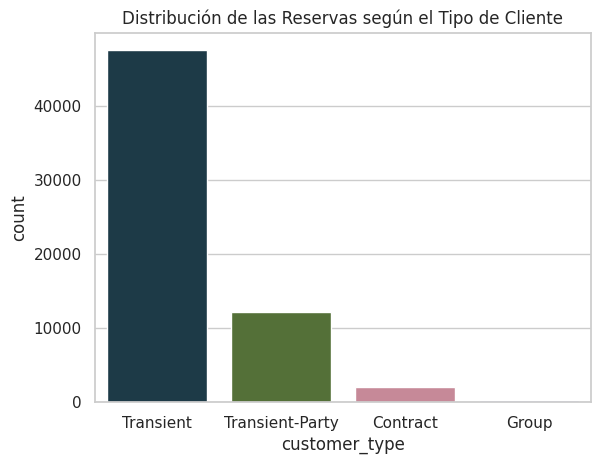

In [178]:
sns.countplot(x='customer_type', data = df_hotels, palette="cubehelix").set(title="Distribución de las Reservas según el Tipo de Cliente")
sns.set_theme(style="whitegrid")
plt.show()

La mayor cantidad de reservas son de clientes transientes.

##### Comparacion con el target

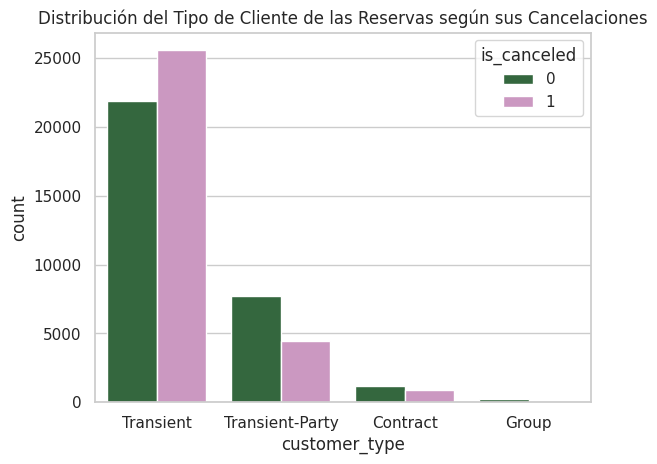

In [179]:
sns.countplot(x='customer_type', data = df_hotels, palette="cubehelix", hue = 'is_canceled').set(title="Distribución del Tipo de Cliente de las Reservas según sus Cancelaciones")
sns.set_theme(style="whitegrid")
plt.show()

Los clientes transientes son aquellos que tienen la mayor cantidad de reservas pero también son aquellos que más cancelan sus reservas.

#### is_cancelled

##### Analisis Estadistico:

In [180]:
df_hotels.is_canceled.value_counts()

0    30972
1    30941
Name: is_canceled, dtype: int64

##### Valores Faltantes:

In [181]:
df_hotels.is_canceled.isna().sum()

0

No hay variables nulas en esta variable en el dataset.

##### Graficos:

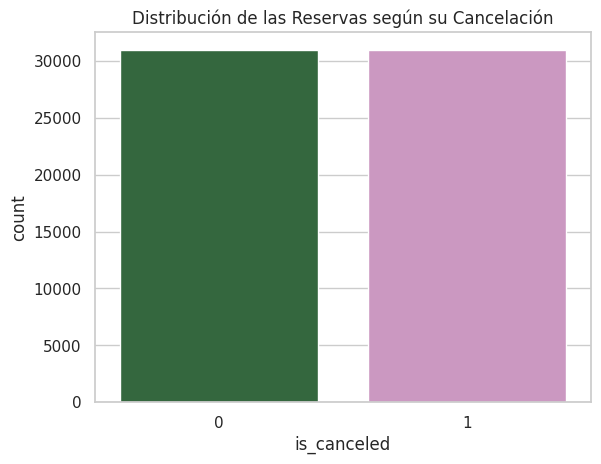

In [182]:
sns.countplot(x='is_canceled', data = df_hotels, palette="cubehelix").set(title="Distribución de las Reservas según su Cancelación")
sns.set_theme(style="whitegrid")
plt.show()

In [183]:
variables_cualitativas = df_hotels.select_dtypes(include=["object"]).columns
informe_frecuencias = pd.DataFrame(columns=["Variable", "Valor", "Frecuencia"])
for variable in variables_cualitativas:
    frecuencia_valores = df_hotels[variable].value_counts().reset_index()
    frecuencia_valores.columns = ["Valor", "Frecuencia"]
    frecuencia_valores["Variable"] = variable
    informe_frecuencias = pd.concat([informe_frecuencias, frecuencia_valores], ignore_index=True)
informe_frecuencias = informe_frecuencias.sort_values(by=["Variable", "Frecuencia"], ascending=[True, False])
informe_frecuencias

Variable    Valor Frecuencia
2    arrival_date_month   August       7176
3    arrival_date_month     July       6524
4    arrival_date_month      May       6159
5    arrival_date_month    April       5878
6    arrival_date_month  October       5863
..                  ...      ...        ...
187  reserved_room_type        B        580
188  reserved_room_type        C        482
189  reserved_room_type        H        334
190  reserved_room_type        P          7
191  reserved_room_type        L          1

[62124 rows x 3 columns]

###<u>Variables Cuantitativas:</u>

#### Lead_time

Analizamos la informacion de la variable lead_time

##### Analisis estadistico:

In [184]:
df_hotels.lead_time.describe()

count    61913.000000
mean       112.248187
std        110.717953
min          0.000000
25%         23.000000
50%         78.000000
75%        172.000000
max        629.000000
Name: lead_time, dtype: float64

Hacemos un recuento de los valores unicos de la columna lead_time

In [185]:
df_hotels.lead_time.value_counts().reset_index()

index  lead_time
0        0       2764
1        1       1530
2        2        895
3        3        807
4        4        791
..     ...        ...
467    371          1
468    375          1
469    399          1
470    424          1
471    400          1

[472 rows x 2 columns]

##### Valores Faltantes:

Analizamos si hay algun valor invalido/incorrectos:

In [186]:
df_hotels.lead_time.isna().sum()

0

In [187]:
(df_hotels['lead_time'] >= 0).value_counts()

True    61913
Name: lead_time, dtype: int64

No hay valores inválidos en el campo lead_time del dataset.

##### Análisis Gráfico:

Veamos como se comporta la grafica segun la cantidad de dias de espera y de llegada con frecuencia

Text(0, 0.5, 'frecuencia')

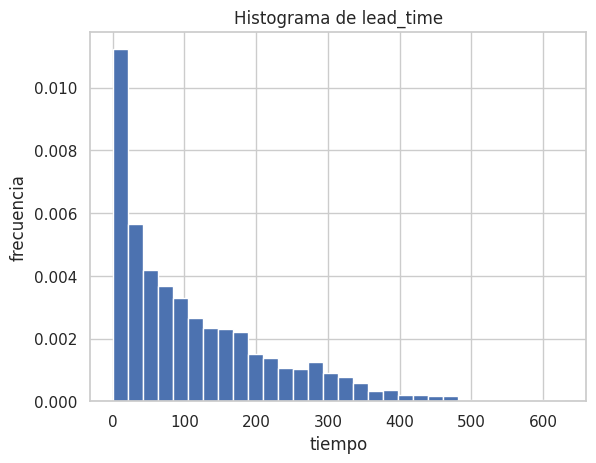

In [188]:
plt.hist(df_hotels['lead_time'],bins =30, alpha = 1, density = True)
plt.title("Histograma de lead_time")
plt.xlabel("tiempo")
plt.ylabel("frecuencia")


En general, las reservas se hacen con poco tiempo de anticipacion.


La mayoria de los valores se encuentran por debajo de los 500, ahora veamos que ocurre en otro gráfico.

[Text(0.5, 1.0, 'Boxplot de frecuencia de espera')]

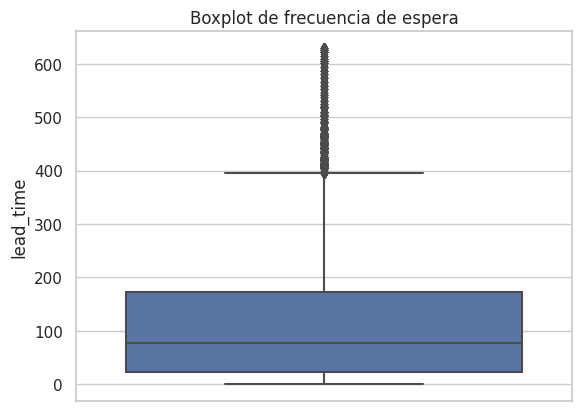

In [189]:
sns.boxplot(y=df_hotels.lead_time).set(title = "Boxplot de frecuencia de espera")

In [190]:
df_hotels[df_hotels['lead_time'] >= 500].shape

(319, 29)

##### Outliers:

A partir del gráfico pudimos deducir que los valores "raros" se encuentran de 400 para arriba de dias de espera.

Veamos que porcentaje tiene estos valores raros con respecto a los demas valores.

In [191]:
porcentaje_valores_raros = len(df_hotels[df_hotels['lead_time'] >= 500]) * 100 / len(df_hotels.lead_time)
porcentaje_valores_raros

0.5152391258701726

Como el porcentaje es mínimo , eliminamos las filas de esos valores raros

In [192]:
df_hotels.drop(df_hotels[df_hotels['lead_time']>=500].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                       D               0   No Deposit                    0   
1                       A               0   No Deposit                    0   
2                       F               0   No Deposit                    0   
3                       A               0   Non Refund                    0   
4                       A               0   No Deposit                    0   
...                   ...             ...          ...                  ...   
61908                   D               0   No Deposit                    0   
61909                   A               0   No Deposit                    0   
61910                   A               0   No Deposit                    0   
61911                   A               0   Non Refund                    0   
61912                   D               1   No Deposit                    0   

         customer_type     adr  required_car_parking_spaces  \
0            Transient  115.50                            0   
1            Transient   42.00                            1   
2            Transient  229.00                            0   
3            Transient   75.00                            0   
4      Transient-Party   75.00                            0   
...                ...     ...                          ...   
61908        Transient   48.00                            0   
61

Después de sacar los valores raros /outliers vemos como quedan nuestros gráficos

Text(0, 0.5, 'frecuencia')

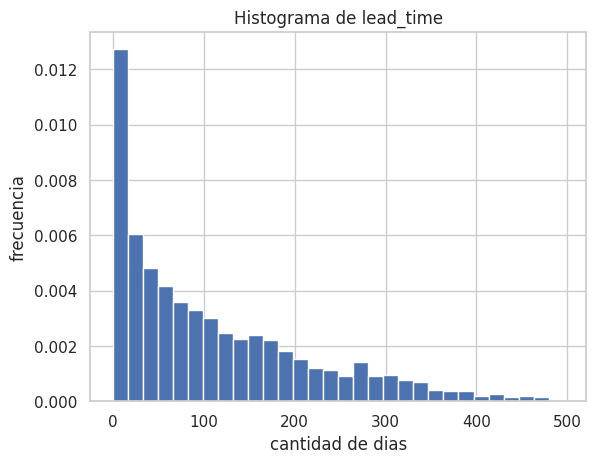

In [193]:
plt.hist(df_hotels['lead_time'],bins =30, alpha = 1, density = True)
plt.title("Histograma de lead_time")
plt.xlabel("cantidad de dias")
plt.ylabel("frecuencia")

Text(0.5, 1.0, 'Boxplot de frecuencia de espera')

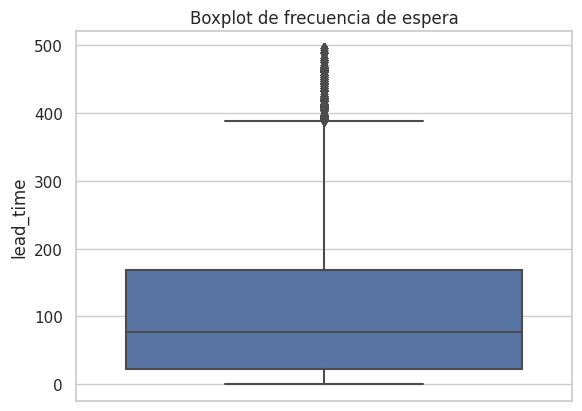

In [194]:
sns.boxplot(y=df_hotels.lead_time)
plt.title("Boxplot de frecuencia de espera")

##### Comparacion con el Target

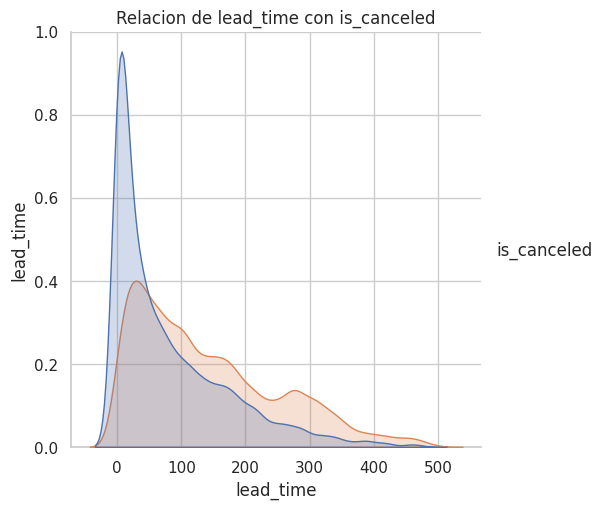

In [195]:
columna_a_comparar = ['lead_time', 'is_canceled']
sns.pairplot(data = df_hotels[columna_a_comparar], hue = 'is_canceled', height = 5). set(title = "Relacion de lead_time con is_canceled")

Como se observa en el gráfico, al tener poco tiempo de espera no hay muchas cancelaciones y a medida que aumenta ese tiempo de espera, aumentan las cancelaciones.

#### stays_in_weekend_nights

Analizamos la informacion de la variable stays_in_weekend_nights

##### Analisis estadistico:

In [196]:
df_hotels.stays_in_weekend_nights.describe()

count    61594.000000
mean         0.927331
std          0.993662
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

In [ ]:
df_hotels.stays_in_weekend_nights.describe()

count    61594.000000
mean         0.927331
std          0.993662
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: stays_in_weekend_nights, dtype: float64

##### Valores faltantes:

In [197]:
df_hotels.stays_in_weekend_nights.isna().sum()

0

Vemos que la columna stays_in_weekend_nights no posee filas NaN/nulas

In [198]:
(df_hotels['stays_in_weekend_nights'] >= 0).value_counts()

True    61594
Name: stays_in_weekend_nights, dtype: int64

No hay valores invalidos de esta variable en el dataset.

##### Analisis gráfico:

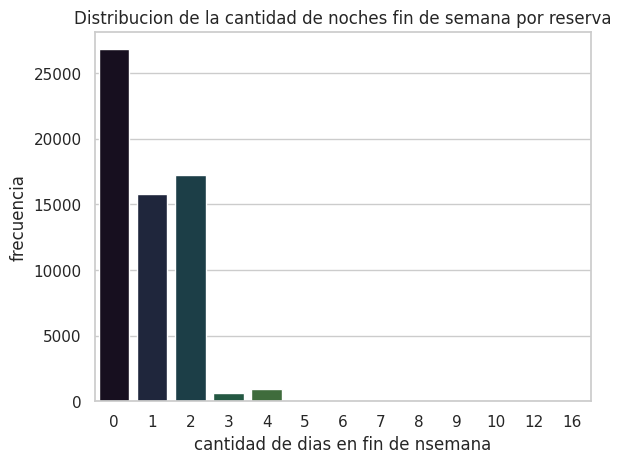

In [199]:
sns.countplot(x="stays_in_weekend_nights", data = df_hotels, palette="cubehelix")
plt.title("Distribucion de la cantidad de noches fin de semana por reserva")
plt.xlabel("cantidad de dias en fin de nsemana")
plt.ylabel("frecuencia")
plt.show()


Mientras menos noches se quedan en el hotel, hay menos cancelaciones.

Text(0.5, 1.0, 'Boxplot de stays_in_weekend_nights')

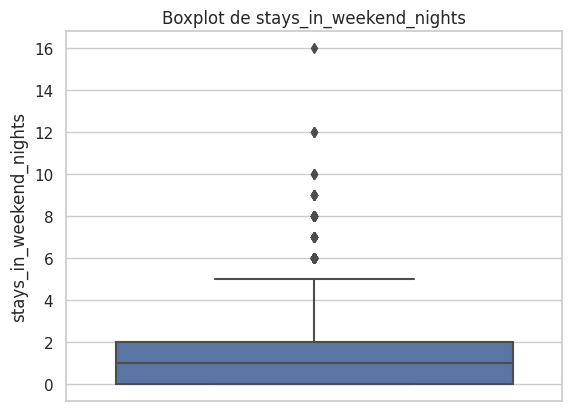

In [200]:
sns.boxplot(y=df_hotels.stays_in_weekend_nights)
plt.title("Boxplot de stays_in_weekend_nights")

##### Outliers:

Vemos que apartir de 5 dias de fin de semana ya hay pocas reservas. A partir de los 9 dias de fin de semana ya nos vemos reservas , asi que trabajamos apartir de ahi.

In [201]:
cantidad_de_reservas_de_9 = df_hotels[df_hotels['stays_in_weekend_nights'] >= 9]
cantidad_de_reservas_de_9

hotel  lead_time  arrival_date_year arrival_date_month  \
3855     City Hotel        123               2017            January   
9229   Resort Hotel         13               2016              April   
14236    City Hotel         25               2015           November   
18816    City Hotel         12               2016           February   
30395  Resort Hotel         88               2017            January   
31310  Resort Hotel        322               2017            January   
31408  Resort Hotel         59               2016           November   
43667  Resort Hotel        242               2017           February   
47601    City Hotel          3               2016           November   
54391  Resort Hotel        122               2016            January   
56096    City Hotel         12               2016           February   
57428  Resort Hotel        214               2016            January   
60483  Resort Hotel        192               2017            January   

       arrival_date_week_number  arrival_date_day_of_month  \
3855                          3                         15   
9229                         18                         25   
14236                        49                         30   
18816                         6                          1   
30395                         4                         24   
31310                         2                         10   
31408                        46                         12   
43667                         7                         17   
47601                        47                         14   
54391                         3                         12   
56096                         9                         22   
57428                         5                         26   
60483                         2                         14   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
3855                        10                    20       3       0.0  ...   
9229                         9                    24       2       0.0  ...   
14236                        9                    24       2       0.0  ...   
18816                        9                    20       1       0.0  ...   
30395                       10                    25       2       0.0  ...   
31310                       16                    40       2       0.0  ...   
31408                        9                    21       1       0.0  ...   
43667                       12                    30       2       0.0  ...   
47601                        9                    25       2       0.0  ...   
54391                       12                    30       2       0.0  ...   
56096                        9                    20       2       0.0  ...   
57428                       12                    30       2       0.0  ...   
60483                       10                    25       2       0.0  ...   

       assigned_room_type booking_changes deposit_type days_in_waiting_list  \
3855                    D               1   No Deposit                    0   
9229                    D               0   No Deposit                    0   
14236                   A               1   No Deposit                    0   
18816                   A               0   No Deposit                    0   
30395                   D               0   No Deposit                    0   
31310                   A               0   No Deposit                    0   
31408                   A               0   No Deposit                    0   
43667                   D               0   No Deposit                    0   
47601                   A               3   No Deposit                    0   
54391                   A               0   No Deposit                    0   
56096                   D               0   No Deposit                    0   
57428                   D               0   No Deposit                    0   
60

##### Comparcaion con el Target:

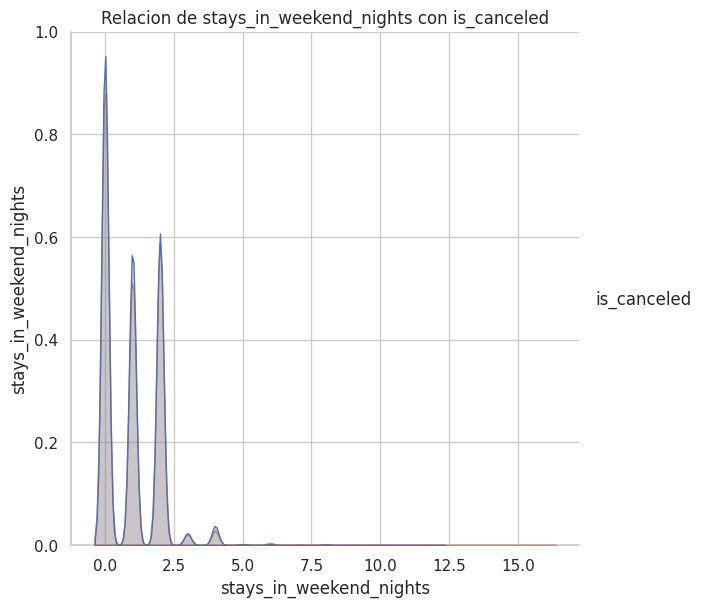

In [202]:
columna_a_comparar = ['stays_in_weekend_nights', 'is_canceled']
sns.pairplot(data = df_hotels[columna_a_comparar], hue = 'is_canceled', height = 6). set(title = "Relacion de stays_in_weekend_nights con is_canceled")

#### stays_in_week_nights

Analizamos la informacion de la variable stays_in_week_nights

##### Analisis estadistico:

In [203]:
df_hotels.stays_in_week_nights.describe()

count    61594.000000
mean         2.513281
std          1.888691
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64

Hacemos un recuento de los valores unicos de la columna stays_in_week_nights

In [204]:
df_hotels.lead_time.value_counts().reset_index()

index  lead_time
0        0       2764
1        1       1530
2        2        895
3        3        807
4        4        791
..     ...        ...
441    371          1
442    399          1
443    380          1
444    424          1
445    400          1

[446 rows x 2 columns]

##### Valores Faltantes:

Analizamos si hay algun valor invalido/incorrectos:

In [205]:
df_hotels.stays_in_week_nights.isna().sum()

0

In [206]:
(df_hotels['stays_in_week_nights'] >= 0).value_counts()

True    61594
Name: stays_in_week_nights, dtype: int64

No hay valores inválidos en el campo stays_in_week_nights del dataset.

##### Análisis Gráfico:

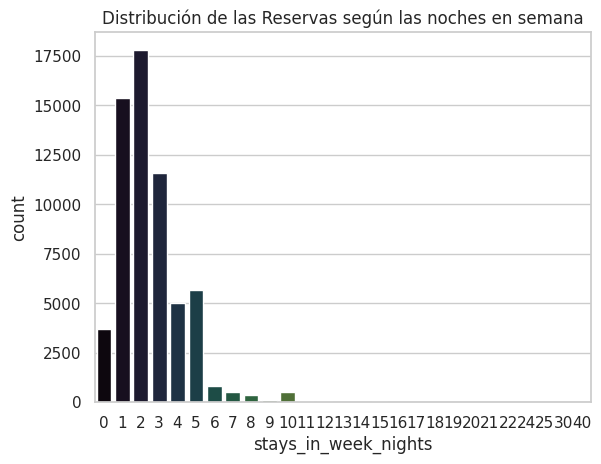

In [207]:
sns.countplot(x='stays_in_week_nights', data = df_hotels, palette="cubehelix").set(title="Distribución de las Reservas según las noches en semana")
sns.set_theme(style="whitegrid")
plt.show()

Cuando no se queda ninguna noche, es cuando es mejor la proporcion de cancelados. En cambio, a medida que avanza la cantidad de noches la proporcion de cancelados aumenta.

[Text(0.5, 1.0, 'Boxplot de stays_in_week_nights')]

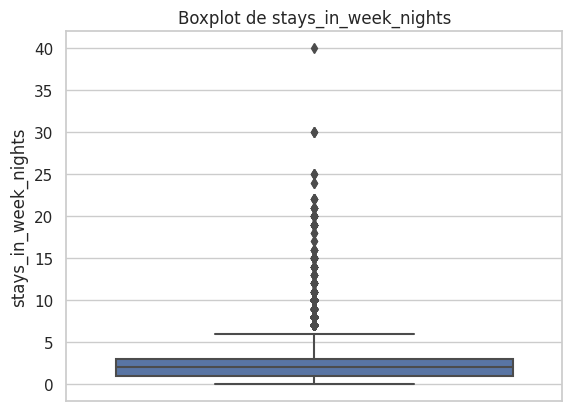

In [208]:
sns.boxplot(y=df_hotels.stays_in_week_nights).set(title = "Boxplot de stays_in_week_nights")

Observamos que hay unos valores anomalos a partir de 25 noches.

In [209]:
df_hotels[df_hotels['stays_in_week_nights'] >= 25].shape

(7, 29)

##### Outliers:

A partir del grafico pudimos deducir que los valores "raros" se encuentran de 25 para arriba de noches en la semana.

Veamos que porcentaje tiene estos valores raros con respecto a los demas valores.

In [210]:
porcentaje_valores_raros = len(df_hotels[df_hotels['stays_in_week_nights'] >= 25]) * 100 / len(df_hotels.stays_in_week_nights)
porcentaje_valores_raros

0.011364743319154463

Como el porcentaje es mínimo , eliminamos las filas de esos valores raros.

Veamos que ocurren en la reserva de 11 noches de la semana para adelante, ya que no se aprecia mucho en el grafico.

In [211]:
reservas_11_noches_semanas_o_mas = df_hotels[df_hotels['stays_in_week_nights']>=11]
reservas_11_noches_semanas_o_mas.shape[0]

220

In [212]:
df_hotels.drop(df_hotels[df_hotels['stays_in_week_nights']>=25].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                       D               0   No Deposit                    0   
1                       A               0   No Deposit                    0   
2                       F               0   No Deposit                    0   
3                       A               0   Non Refund                    0   
4                       A               0   No Deposit                    0   
...                   ...             ...          ...                  ...   
61908                   D               0   No Deposit                    0   
61909                   A               0   No Deposit                    0   
61910                   A               0   No Deposit                    0   
61911                   A               0   Non Refund                    0   
61912                   D               1   No Deposit                    0   

         customer_type     adr  required_car_parking_spaces  \
0            Transient  115.50                            0   
1            Transient   42.00                            1   
2            Transient  229.00                            0   
3            Transient   75.00                            0   
4      Transient-Party   75.00                            0   
...                ...     ...                          ...   
61908        Transient   48.00                            0   
61

Despues de sacar los valores raros /outliers vemos como quedan nuestros graficos

Text(0, 0.5, 'frecuencia')

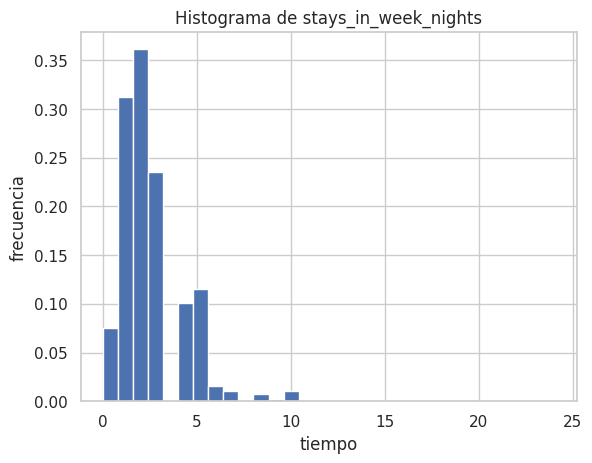

In [213]:
plt.hist(df_hotels['stays_in_week_nights'],bins =30, alpha = 1, density = True)
plt.title("Histograma de stays_in_week_nights")
plt.xlabel("tiempo")
plt.ylabel("frecuencia")

Text(0.5, 1.0, 'Boxplot de frecuencia de espera')

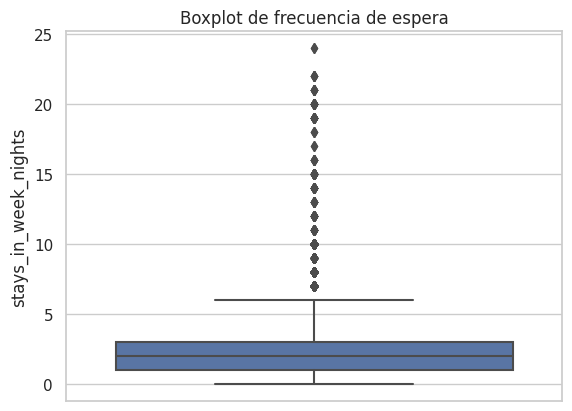

In [214]:
sns.boxplot(y=df_hotels.stays_in_week_nights)
plt.title("Boxplot de frecuencia de espera")

##### Comparacion con el Target:

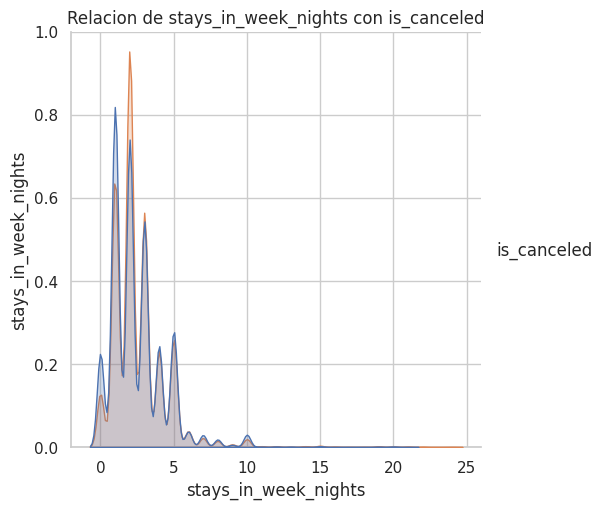

In [215]:
columna_a_comparar = ['stays_in_week_nights', 'is_canceled']
sns.pairplot(data = df_hotels[columna_a_comparar], hue = 'is_canceled', height = 5). set(title = "Relacion de stays_in_week_nights con is_canceled")

#### adults

##### Analisis estadistico

In [216]:
df_hotels.adults.describe()

count    61587.000000
mean         1.862633
std          0.590190
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

In [217]:
df_hotels.adults.value_counts().reset_index()

index  adults
0       2   46671
1       1   11514
2       3    3164
3       0     197
4       4      30
5      26       3
6       5       2
7      40       1
8      20       1
9       6       1
10     10       1
11     27       1
12     55       1

##### Valores Faltantes:

In [218]:
df_hotels.adults.isna().sum()

0

In [219]:
(df_hotels['adults'] > 0).value_counts()

True     61390
False      197
Name: adults, dtype: int64

##### Analisis Grafico:

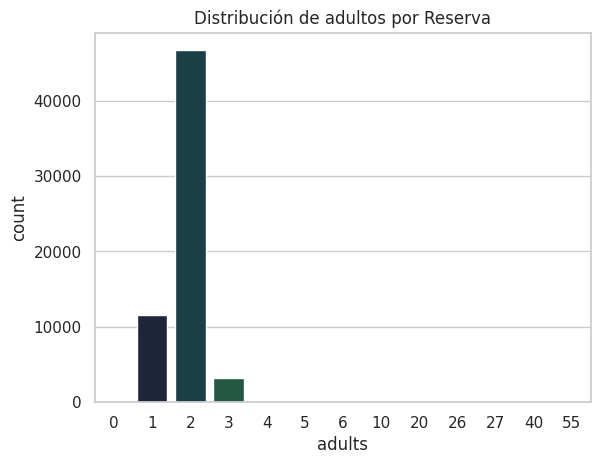

In [220]:
sns.countplot(x='adults', data = df_hotels, palette="cubehelix").set(title="Distribución de adultos por Reserva")
sns.set_theme(style="whitegrid")
plt.show()

Text(0.5, 1.0, 'Boxplot de adultos')

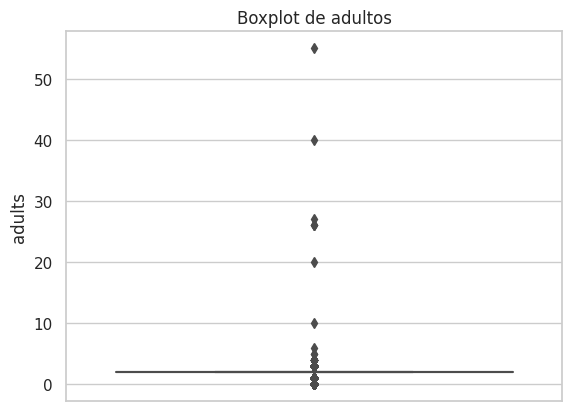

In [221]:
sns.boxplot(y=df_hotels.adults)
plt.title("Boxplot de adultos")

##### Outliers:

Vemos que normalmente hay entre uno y tres adultos por reservas. Son pocos casos de cero adultos y de tres o mas adultos, lo cual los podemos eliminar porque el porcentaje de registros es muy chico.

In [222]:
reservas_de_o_adultos = df_hotels[df_hotels['adults']==0]
reservas_de_o_adultos.shape[0]

197

In [223]:
reservas_de_mas_3_adultos = df_hotels[df_hotels['adults']> 3]
reservas_de_mas_3_adultos.shape[0]

41

In [224]:
print(f"Cantidad de reservas sin adultos o mas de 3 adultos a eliminar:{reservas_de_o_adultos.shape[0] + reservas_de_mas_3_adultos.shape[0]}")

Cantidad de reservas sin adultos o mas de 3 adultos a eliminar:238


In [225]:
df_hotels.drop(df_hotels[df_hotels['adults']==0].index, axis='index', inplace=True)
df_hotels.drop(df_hotels[df_hotels['adults']>3].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61344  Resort Hotel         24               2017            January   
61345    City Hotel          0               2016          September   
61346    City Hotel         10               2017                May   
61347  Resort Hotel        143               2015            October   
61348    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61344                         4                         27   
61345                        36                          2   
61346                        19                          8   
61347                        41                         10   
61348                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61344                        0                     2       2       0.0  ...   
61345                        0                     1       1       0.0  ...   
61346                        1                     2       1       0.0  ...   
61347                        2                     5       2       0.0  ...   
61348                        2                     5       2       0.0  ...   

       assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                       D               0   No Deposit                    0   
1                       A               0   No Deposit                    0   
2                       F               0   No Deposit                    0   
3                       A               0   Non Refund                    0   
4                       A               0   No Deposit                    0   
...                   ...             ...          ...                  ...   
61344                   D               0   No Deposit                    0   
61345                   A               0   No Deposit                    0   
61346                   A               0   No Deposit                    0   
61347                   A               0   Non Refund                    0   
61348                   D               1   No Deposit                    0   

         customer_type     adr  required_car_parking_spaces  \
0            Transient  115.50                            0   
1            Transient   42.00                            1   
2            Transient  229.00                            0   
3            Transient   75.00                            0   
4      Transient-Party   75.00                            0   
...                ...     ...                          ...   
61344        Transient   48.00                            0   
61

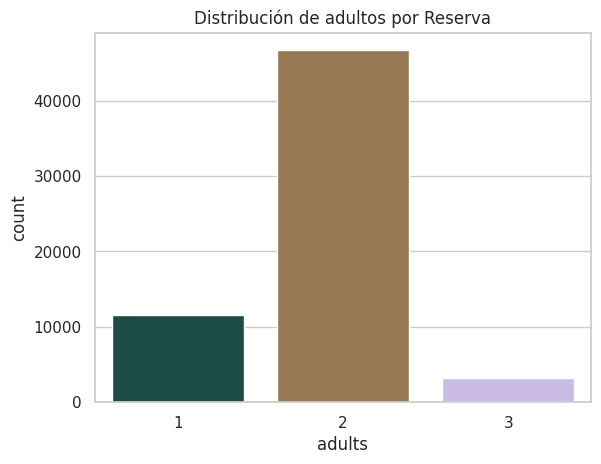

In [226]:
sns.countplot(x='adults', data = df_hotels, palette="cubehelix").set(title="Distribución de adultos por Reserva")
sns.set_theme(style="whitegrid")
plt.show()

#### children

##### Analisis Estadistico:

In [227]:
df_hotels.children.describe()

count    61345.000000
mean         0.101834
std          0.395364
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

In [228]:
df_hotels.children.value_counts().reset_index()

index  children
0    0.0     57016
1    1.0      2454
2    2.0      1839
3    3.0        35
4   10.0         1

##### Valores Faltantes:

In [229]:
df_hotels.children.isna().sum()

4

In [230]:
(df_hotels['children'] >= 0).value_counts()

True     61345
False        4
Name: children, dtype: int64

##### Analisis Grafico:

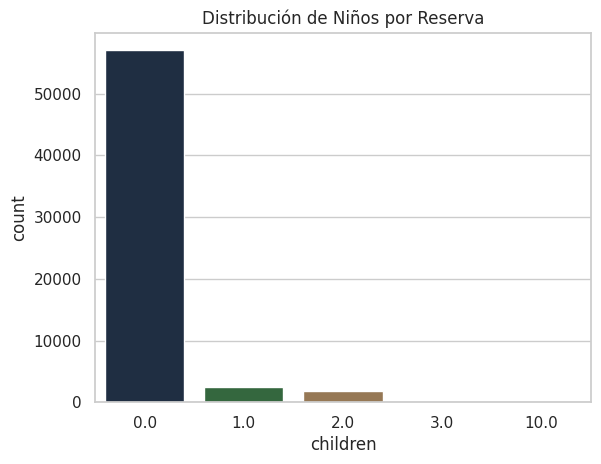

In [231]:
sns.countplot(x='children', data = df_hotels, palette="cubehelix").set(title="Distribución de Niños por Reserva")
sns.set_theme(style="whitegrid")
plt.show()

In [232]:
df_hotels.drop(df_hotels[df_hotels['children'].isna() == True].index, axis='index', inplace=True)


In [233]:
df_hotels.children.isna().sum()

0

Text(0.5, 1.0, 'Boxplot de Niños')

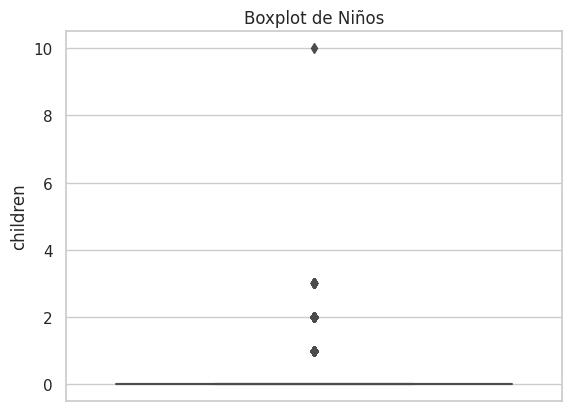

In [234]:
sns.boxplot(y=df_hotels.children)
plt.title("Boxplot de Niños")

##### Outliers:

La mayor cantidad de reservas fueran hechas con 0 niños, pero en el grafico se observa un valor fuera del rango que tiene como numero a 10. veamos cuantas reservas hay con ese numero de niños.

In [235]:
reservas_de_10_ninos = df_hotels[df_hotels['children']>=10]
reservas_de_10_ninos.shape[0]

1

Como la cantidad es minima, debe ser un dato mal ingresado. Por esa razon eliminamos esa reserva.

In [236]:
df_hotels.drop(df_hotels[df_hotels['children']>=10].index, axis='index', inplace=True)

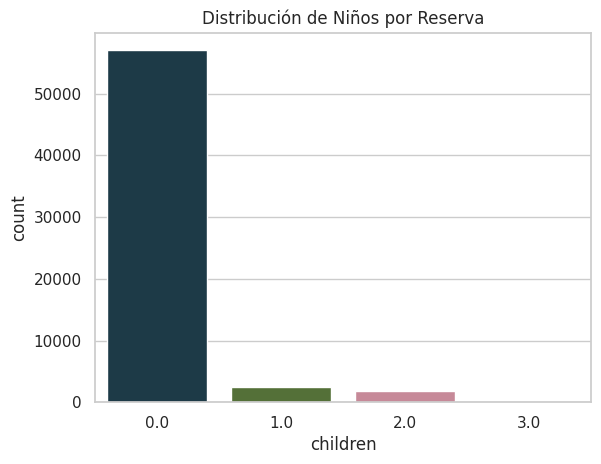

In [237]:
sns.countplot(x='children', data = df_hotels, palette="cubehelix").set(title="Distribución de Niños por Reserva")
sns.set_theme(style="whitegrid")
plt.show()

#### babies

##### Analisis Estadistico

In [238]:
df_hotels.babies.describe()

count    61344.000000
mean         0.007205
std          0.092496
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: babies, dtype: float64

In [239]:
df_hotels.babies.value_counts().reset_index()

index  babies
0      0   60917
1      1     419
2      2       7
3      9       1

##### Valores Faltantes:

In [240]:
df_hotels.babies.isna().sum()

0

In [241]:
(df_hotels['babies'] >= 0).value_counts()

True    61344
Name: babies, dtype: int64

##### Analisis Grafico:

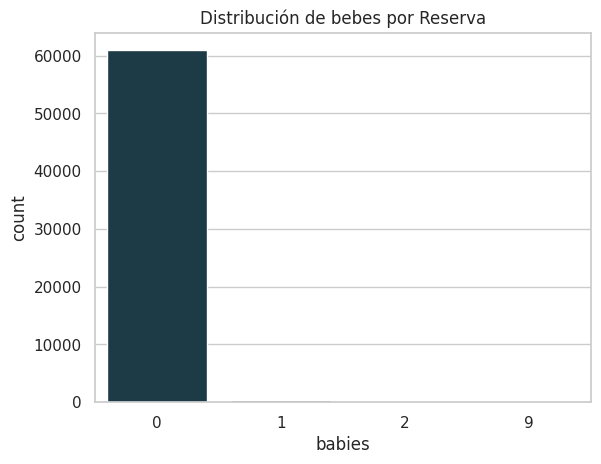

In [242]:
sns.countplot(x='babies', data = df_hotels, palette="cubehelix").set(title="Distribución de bebes por Reserva")
sns.set_theme(style="whitegrid")
plt.show()

Text(0.5, 1.0, 'Boxplot de Bebes')

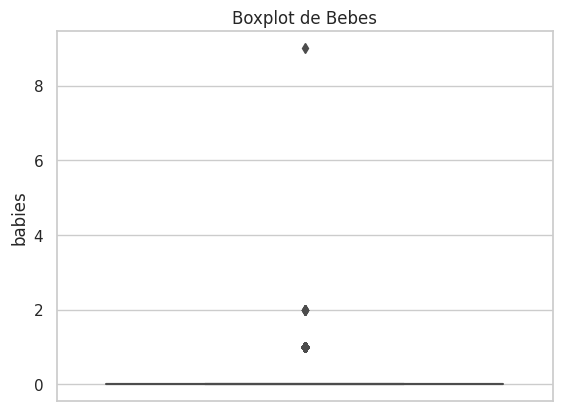

In [243]:
sns.boxplot(y=df_hotels.babies)
plt.title("Boxplot de Bebes")

##### Outliers:

Veamos los casos borders que puedn suceder: Algun/a bebe/s tenga una reserva sin un adultos

In [244]:
df_hotels[(df_hotels['babies'] >= 1) & (df_hotels['adults'] < 1)]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, id, is_canceled]
Index: []

[0 rows x 29 columns]

Tenemos un caso, viendo el grafico, hay reservas con 9 bebes. veamos cuantas son:

In [245]:
df_hotels[(df_hotels['babies'] >= 9)].shape[0]

1

Como solo tenemos una sola reserva, lo eliminamos.

In [246]:
df_hotels.drop(df_hotels[df_hotels['babies']>=9].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61338  Resort Hotel         24               2017            January   
61339    City Hotel          0               2016          September   
61340    City Hotel         10               2017                May   
61341  Resort Hotel        143               2015            October   
61342    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61338                         4                         27   
61339                        36                          2   
61340                        19                          8   
61341                        41                         10   
61342                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61338                        0                     2       2       0.0  ...   
61339                        0                     1       1       0.0  ...   
61340                        1                     2       1       0.0  ...   
61341                        2                     5       2       0.0  ...   
61342                        2                     5       2       0.0  ...   

       assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                       D               0   No Deposit                    0   
1                       A               0   No Deposit                    0   
2                       F               0   No Deposit                    0   
3                       A               0   Non Refund                    0   
4                       A               0   No Deposit                    0   
...                   ...             ...          ...                  ...   
61338                   D               0   No Deposit                    0   
61339                   A               0   No Deposit                    0   
61340                   A               0   No Deposit                    0   
61341                   A               0   Non Refund                    0   
61342                   D               1   No Deposit                    0   

         customer_type     adr  required_car_parking_spaces  \
0            Transient  115.50                            0   
1            Transient   42.00                            1   
2            Transient  229.00                            0   
3            Transient   75.00                            0   
4      Transient-Party   75.00                            0   
...                ...     ...                          ...   
61338        Transient   48.00                            0   
61

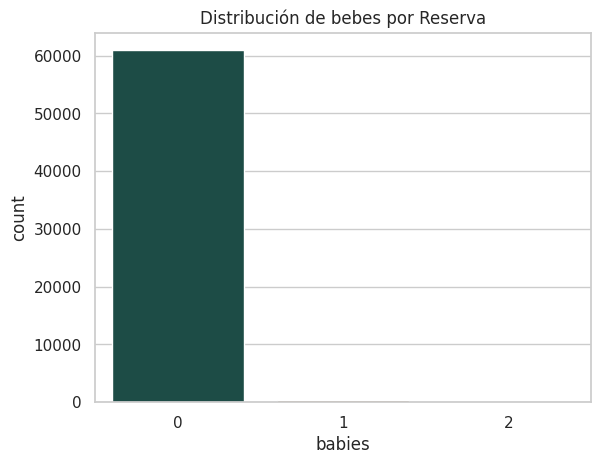

In [247]:
sns.countplot(x='babies', data = df_hotels, palette="cubehelix").set(title="Distribución de bebes por Reserva")
sns.set_theme(style="whitegrid")
plt.show()

#### previous_cancellations

Analizamos la informacion de la variable previous_cancellations

##### Analisis Estadistico:

In [248]:
df_hotels.previous_cancellations.describe()

count    61343.000000
mean         0.115775
std          0.998220
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

Hacemos un recuento de los valores unicos de la columna previous_cancellations.

In [249]:
df_hotels.previous_cancellations.value_counts().reset_index()

index  previous_cancellations
0       0                   56953
1       1                    4134
2       2                      60
3      24                      36
4       3                      34
5      26                      20
6      19                      17
7       4                      16
8      25                      16
9      11                      15
10     14                      12
11      6                      12
12      5                       9
13     13                       8
14     21                       1

##### Valores faltantes:

Veamos si hay filas que contienen valores incorrectos / nulos

In [250]:
df_hotels.previous_cancellations.isna().sum()

0

In [251]:
(df_hotels['previous_cancellations'] >= 0).value_counts()

True    61343
Name: previous_cancellations, dtype: int64

No tiene valores nulos la columna previous_cancellations

##### Analisis Grafico:

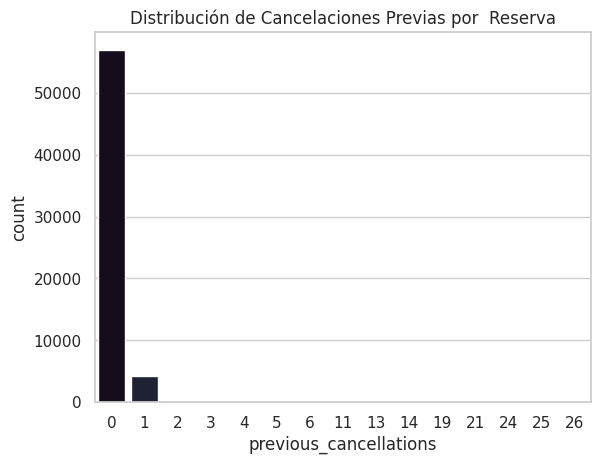

In [252]:
sns.countplot(x='previous_cancellations', data = df_hotels, palette="cubehelix").set(title="Distribución de Cancelaciones Previas por  Reserva")
sns.set_theme(style="whitegrid")
plt.show()

Text(0.5, 1.0, 'Boxplot de previous_cancellations')

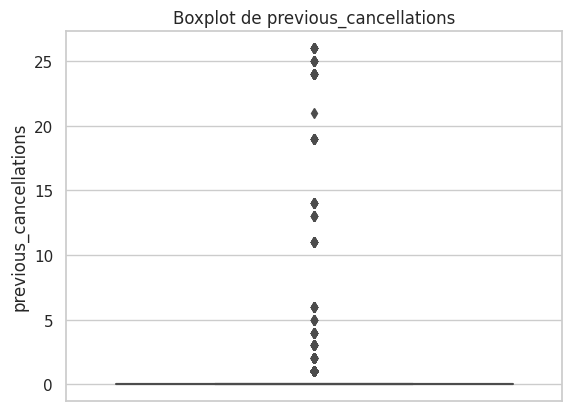

In [253]:
sns.boxplot(y=df_hotels.previous_cancellations)
plt.title("Boxplot de previous_cancellations")

##### Outliers:

In [254]:
df_hotels[df_hotels['previous_cancellations'] >= 2].shape

(256, 29)

In [255]:
porcentaje_valores_raros = len(df_hotels[df_hotels['previous_cancellations'] >= 2]) * 100 / len(df_hotels.previous_cancellations)
porcentaje_valores_raros

0.4173255302153465

Como el porcentaje es minimo, estos valores  se eliminan ya que se consideran como outliers.



In [256]:
df_hotels.drop(df_hotels[df_hotels['previous_cancellations']>=2].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61082  Resort Hotel         24               2017            January   
61083    City Hotel          0               2016          September   
61084    City Hotel         10               2017                May   
61085  Resort Hotel        143               2015            October   
61086    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61082                         4                         27   
61083                        36                          2   
61084                        19                          8   
61085                        41                         10   
61086                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61082                        0                     2       2       0.0  ...   
61083                        0                     1       1       0.0  ...   
61084                        1                     2       1       0.0  ...   
61085                        2                     5       2       0.0  ...   
61086                        2                     5       2       0.0  ...   

       assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                       D               0   No Deposit                    0   
1                       A               0   No Deposit                    0   
2                       F               0   No Deposit                    0   
3                       A               0   Non Refund                    0   
4                       A               0   No Deposit                    0   
...                   ...             ...          ...                  ...   
61082                   D               0   No Deposit                    0   
61083                   A               0   No Deposit                    0   
61084                   A               0   No Deposit                    0   
61085                   A               0   Non Refund                    0   
61086                   D               1   No Deposit                    0   

         customer_type     adr  required_car_parking_spaces  \
0            Transient  115.50                            0   
1            Transient   42.00                            1   
2            Transient  229.00                            0   
3            Transient   75.00                            0   
4      Transient-Party   75.00                            0   
...                ...     ...                          ...   
61082        Transient   48.00                            0   
61

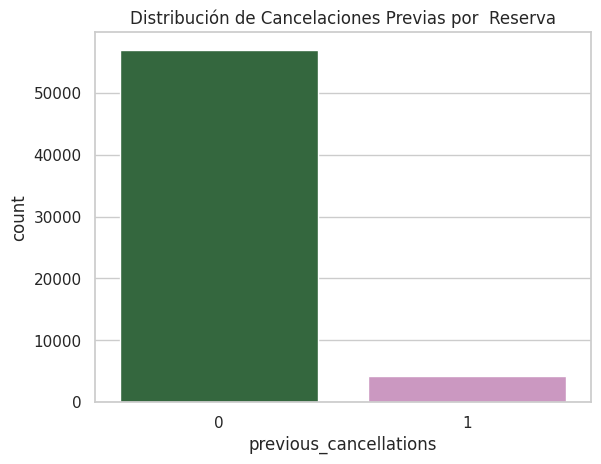

In [257]:
sns.countplot(x='previous_cancellations', data = df_hotels, palette="cubehelix").set(title="Distribución de Cancelaciones Previas por  Reserva")
sns.set_theme(style="whitegrid")
plt.show()

##### Comparacion con el target:

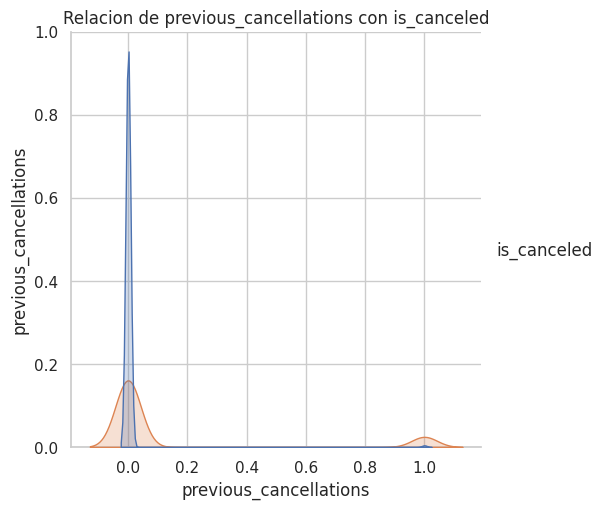

In [258]:
columna_a_comparar = ['previous_cancellations', 'is_canceled']
sns.pairplot(data = df_hotels[columna_a_comparar], hue = 'is_canceled', height =5). set(title = "Relacion de previous_cancellations con is_canceled")

#### previous_bookings_not_cancelled

##### Analisis Estadistico

In [259]:
df_hotels.previous_bookings_not_canceled.describe()

count    61087.000000
mean         0.078986
std          0.824695
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: previous_bookings_not_canceled, dtype: float64

In [260]:
df_hotels.previous_bookings_not_canceled.value_counts().reset_index

<bound method Series.reset_index of 0     59677
1       617
2       251
3       147
4       100
5        73
6        41
8        27
7        26
9        20
10       19
11       15
13       14
12        8
14        8
15        6
18        5
17        4
25        4
16        3
29        3
21        3
22        3
24        3
20        2
26        2
28        2
30        1
19        1
23        1
27        1
Name: previous_bookings_not_canceled, dtype: int64>

##### Valores Faltantes:

In [261]:
(df_hotels['previous_bookings_not_canceled'] >= 0).value_counts()

True    61087
Name: previous_bookings_not_canceled, dtype: int64

In [262]:
df_hotels.previous_bookings_not_canceled.isna().sum()

0

No hay valores invalidos en esta categoria.

##### Analisis Grafico:

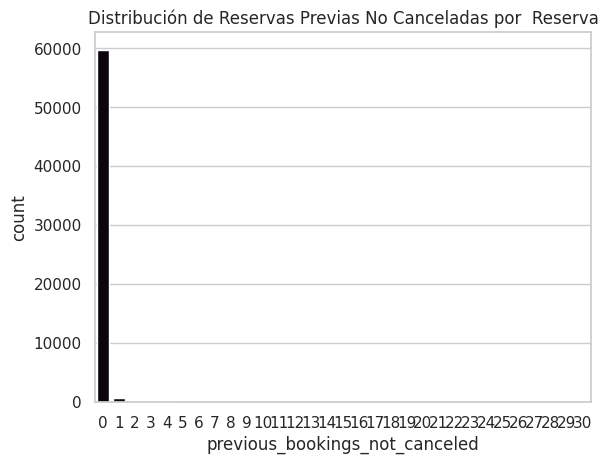

In [263]:
sns.countplot(x='previous_bookings_not_canceled', data = df_hotels, palette="cubehelix").set(title="Distribución de Reservas Previas No Canceladas por  Reserva")
sns.set_theme(style="whitegrid")
plt.show()

Text(0.5, 1.0, 'Boxplot de previous_bookings_not_canceled')

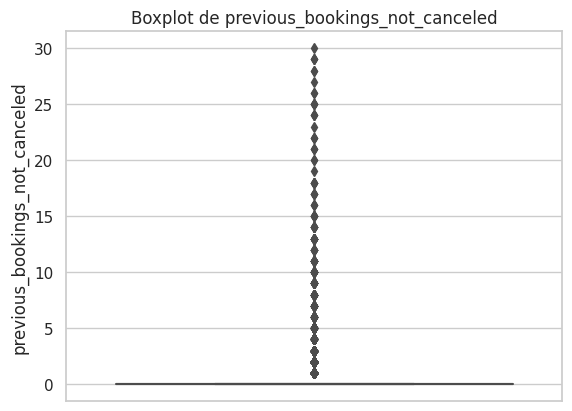

In [264]:
sns.boxplot(y=df_hotels.previous_bookings_not_canceled)
plt.title("Boxplot de previous_bookings_not_canceled")

In [265]:
df_hotels[df_hotels['previous_bookings_not_canceled'] > 0].shape

(1410, 29)

In [266]:
porcentaje_valores_raros = len(df_hotels[df_hotels['previous_bookings_not_canceled'] > 0]) * 100 / len(df_hotels.previous_bookings_not_canceled)
porcentaje_valores_raros

2.3081834105456154

Esta variable no nos aporta informacion para la prediccion del modelo de nuestro target (is_canceled)

In [267]:
df_hotels.drop('previous_bookings_not_canceled', axis='columns', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                       D               0   No Deposit                    0   
1                       A               0   No Deposit                    0   
2                       F               0   No Deposit                    0   
3                       A               0   Non Refund                    0   
4                       A               0   No Deposit                    0   
...                   ...             ...          ...                  ...   
61908                   D               0   No Deposit                    0   
61909                   A               0   No Deposit                    0   
61910                   A               0   No Deposit                    0   
61911                   A               0   Non Refund                    0   
61912                   D               1   No Deposit                    0   

         customer_type     adr  required_car_parking_spaces  \
0            Transient  115.50                            0   
1            Transient   42.00                            1   
2            Transient  229.00                            0   
3            Transient   75.00                            0   
4      Transient-Party   75.00                            0   
...                ...     ...                          ...   
61908        Transient   48.00                            0   
61

#### booking_changes

##### Analisis Estadistico

In [268]:
df_hotels.booking_changes.describe()

count    61087.000000
mean         0.195213
std          0.606271
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64

In [269]:
df_hotels.booking_changes.value_counts().reset_index()

index  booking_changes
0       0            52882
1       1             5751
2       2             1774
3       3              397
4       4              161
5       5               55
6       6               30
7       7               15
8       8                9
9      13                3
10     10                3
11      9                2
12     14                2
13     12                1
14     15                1
15     17                1

##### Valores Faltantes:

In [270]:
df_hotels.booking_changes.isna().sum()

0

In [271]:
(df_hotels['booking_changes'] >= 0).value_counts()

True    61087
Name: booking_changes, dtype: int64

##### Analisis Grafico

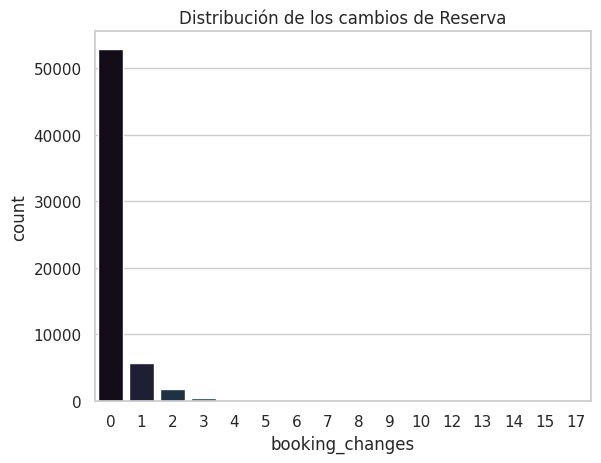

In [272]:
sns.countplot(x='booking_changes', data = df_hotels, palette="cubehelix").set(title="Distribución de los cambios de Reserva")
sns.set_theme(style="whitegrid")
plt.show()

Text(0.5, 1.0, 'Boxplot de booking_changes')

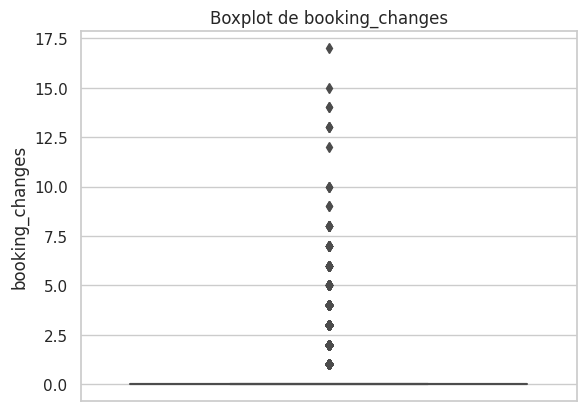

In [273]:
sns.boxplot(y=df_hotels.booking_changes)
plt.title("Boxplot de booking_changes")

In [274]:
df_hotels[df_hotels['booking_changes'] >= 3].shape

(680, 28)

Consideramos que los datos de booking changes no tienen outliers por lo visto en el grafico de box plot.

#### days_in_waiting_list

Analizamos la informacion de la variable days_in_waiting_list:

##### Analisis estadistico:

In [275]:
df_hotels.days_in_waiting_list.describe()

count    61087.000000
mean         2.661810
std         18.722817
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

Hacemos un recuento de los valores unicos de la columna days_in_waiting_list

In [276]:
df_hotels.days_in_waiting_list.value_counts().reset_index()

index  days_in_waiting_list
0        0                 58871
1       39                   155
2       58                    82
3       44                    80
4       31                    77
..     ...                   ...
111     81                     1
112    121                     1
113     97                     1
114    193                     1
115    105                     1

[116 rows x 2 columns]

##### Valores faltantes:

Veamos si hay filas que contienen valores incorrectos / nulos

In [277]:
df_hotels.days_in_waiting_list.isna().sum()

0

In [278]:
(df_hotels['days_in_waiting_list'] >= 0).value_counts()

True    61087
Name: days_in_waiting_list, dtype: int64

No tiene valores nulos la columna days_in_witing_list

##### Analisis Grafico:

Text(0, 0.5, 'frecuencia')

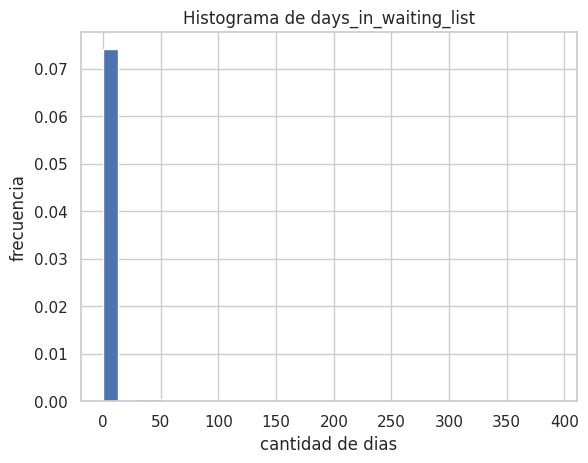

In [279]:
plt.hist(df_hotels['days_in_waiting_list'],bins =30, alpha = 1, density = True)
plt.title("Histograma de days_in_waiting_list")
plt.xlabel("cantidad de dias")
plt.ylabel("frecuencia")


Text(0.5, 1.0, 'Boxplot de days_in_waiting_list')

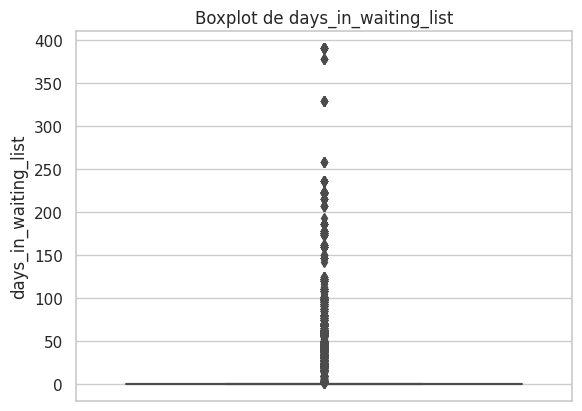

In [280]:
sns.boxplot(y=df_hotels.days_in_waiting_list)
plt.title("Boxplot de days_in_waiting_list")

Analizamos los datos cuando son mas de 250 dias

In [281]:
df_hotels[df_hotels['days_in_waiting_list'] >= 200].shape

(128, 28)

##### outliers:

A partir del grafico pudimos deducir que los valores "raros" se encuentran de 200 para arriba de dias de espera.

Veamos que porcentaje tiene estos valores raros con respecto a los demas valores.

In [282]:
porcentaje_valores_raros = len(df_hotels[df_hotels['days_in_waiting_list'] >= 200]) * 100 / len(df_hotels.days_in_waiting_list)
porcentaje_valores_raros

0.20953721741123316

Como el porcentaje es minimo , eliminamos las filas de esos valores raros

In [283]:
df_hotels.drop(df_hotels[df_hotels['days_in_waiting_list']>=200].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                       D               0   No Deposit                    0   
1                       A               0   No Deposit                    0   
2                       F               0   No Deposit                    0   
3                       A               0   Non Refund                    0   
4                       A               0   No Deposit                    0   
...                   ...             ...          ...                  ...   
61908                   D               0   No Deposit                    0   
61909                   A               0   No Deposit                    0   
61910                   A               0   No Deposit                    0   
61911                   A               0   Non Refund                    0   
61912                   D               1   No Deposit                    0   

         customer_type     adr  required_car_parking_spaces  \
0            Transient  115.50                            0   
1            Transient   42.00                            1   
2            Transient  229.00                            0   
3            Transient   75.00                            0   
4      Transient-Party   75.00                            0   
...                ...     ...                          ...   
61908        Transient   48.00                            0   
61

Despues de sacar los valores raros /outliers vemos como quedan nuestros graficos

Text(0.5, 1.0, 'Boxplot de days_in_waiting_list')

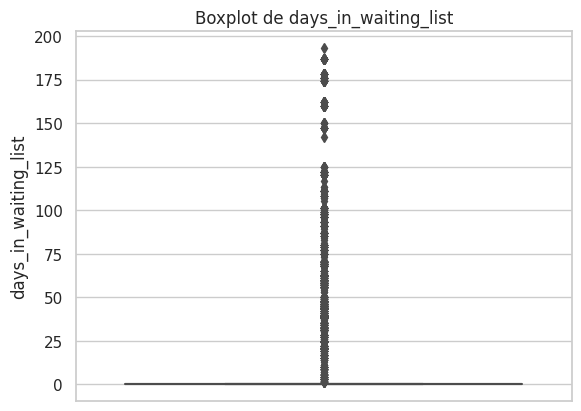

In [284]:
sns.boxplot(y=df_hotels.days_in_waiting_list)
plt.title("Boxplot de days_in_waiting_list")

##### Comparacion con el Target:

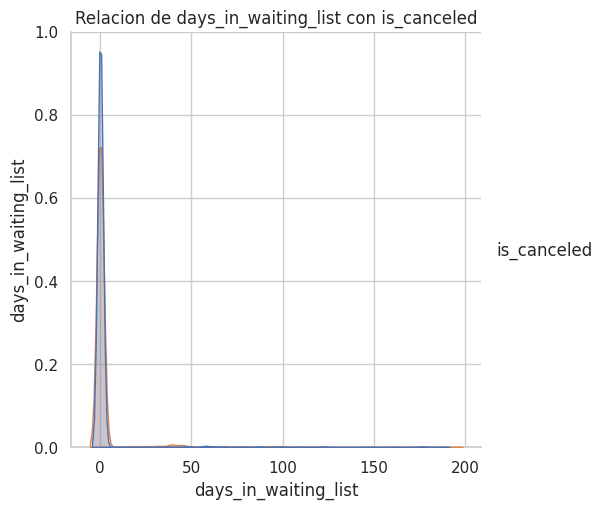

In [285]:
columna_a_comparar = ['days_in_waiting_list', 'is_canceled']
sns.pairplot(data = df_hotels[columna_a_comparar], hue = 'is_canceled', height = 5). set(title = "Relacion de days_in_waiting_list con is_canceled")

#### adr

Analizamos la informacion de la variable adr

##### Analisis Estadistico:

In [286]:
df_hotels.adr.describe()

count    60959.00000
mean       102.94871
std         47.61709
min         -6.38000
25%         70.53000
50%         95.00000
75%        126.00000
max        510.00000
Name: adr, dtype: float64

Hacemos un recuento de los valores unicos de la columna adr:

In [288]:
df_hotels.adr.value_counts().reset_index()

index   adr
0      62.00  2252
1      75.00  1471
2      90.00  1423
3      65.00  1107
4      80.00  1083
...      ...   ...
6111   46.54     1
6112   61.39     1
6113   78.03     1
6114   33.08     1
6115  131.47     1

[6116 rows x 2 columns]

##### Valores faltantes:

Veamos si hay filas que contienen valores incorrectos / nulos

In [289]:
df_hotels.adr.isna().sum()

0

In [290]:
(df_hotels['adr'] >= 0).value_counts()

True     60958
False        1
Name: adr, dtype: int64

Hay un valor que no es válido:. No puede haber ganacia negativa.  Eliminamos esa fila.

In [291]:
df_hotels.drop(df_hotels[df_hotels['adr']<=0].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                       D               0   No Deposit                    0   
1                       A               0   No Deposit                    0   
2                       F               0   No Deposit                    0   
3                       A               0   Non Refund                    0   
4                       A               0   No Deposit                    0   
...                   ...             ...          ...                  ...   
61908                   D               0   No Deposit                    0   
61909                   A               0   No Deposit                    0   
61910                   A               0   No Deposit                    0   
61911                   A               0   Non Refund                    0   
61912                   D               1   No Deposit                    0   

         customer_type     adr  required_car_parking_spaces  \
0            Transient  115.50                            0   
1            Transient   42.00                            1   
2            Transient  229.00                            0   
3            Transient   75.00                            0   
4      Transient-Party   75.00                            0   
...                ...     ...                          ...   
61908        Transient   48.00                            0   
61

##### Analisis Grafico:

Text(0, 0.5, 'frecuencia')

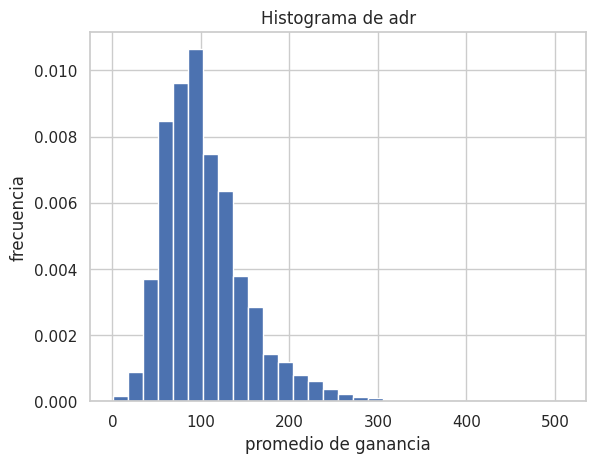

In [292]:
plt.hist(df_hotels['adr'],bins =30, alpha = 1, density = True)
plt.title("Histograma de adr")
plt.xlabel("promedio de ganancia")
plt.ylabel("frecuencia")


La mayoria de los valores se encuentran por debajo de los 300, ahora veamos que ocurre en otro grafico.

Text(0.5, 1.0, 'Boxplot de adr')

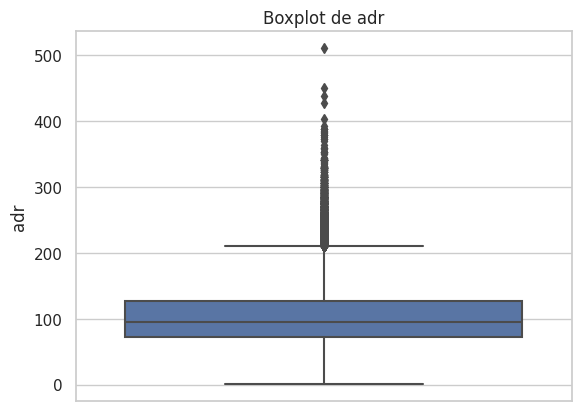

In [293]:
sns.boxplot(y=df_hotels.adr)
plt.title("Boxplot de adr")

In [294]:
df_hotels[df_hotels['adr'] >= 400].shape

(5, 28)

##### Outliers:

A partir del grafico pudimos deducir que los valores "raros" se encuentran de 400 para arriba de dias de espera.

Veamos que porcentaje tiene estos valores raros con respecto a los demas valores.

In [295]:
porcentaje_valores_raros = len(df_hotels[df_hotels['adr'] >= 400]) * 100 / len(df_hotels.adr)
porcentaje_valores_raros

0.008308960382876894

Como el porcentaje es minimo , eliminamos las filas de esos valores raros

In [296]:
df_hotels.drop(df_hotels[df_hotels['adr']>=400].index, axis='index', inplace=True)
df_hotels.reset_index(drop=True)
df_hotels

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61908  Resort Hotel         24               2017            January   
61909    City Hotel          0               2016          September   
61910    City Hotel         10               2017                May   
61911  Resort Hotel        143               2015            October   
61912    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61908                         4                         27   
61909                        36                          2   
61910                        19                          8   
61911                        41                         10   
61912                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61908                        0                     2       2       0.0  ...   
61909                        0                     1       1       0.0  ...   
61910                        1                     2       1       0.0  ...   
61911                        2                     5       2       0.0  ...   
61912                        2                     5       2       0.0  ...   

       assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                       D               0   No Deposit                    0   
1                       A               0   No Deposit                    0   
2                       F               0   No Deposit                    0   
3                       A               0   Non Refund                    0   
4                       A               0   No Deposit                    0   
...                   ...             ...          ...                  ...   
61908                   D               0   No Deposit                    0   
61909                   A               0   No Deposit                    0   
61910                   A               0   No Deposit                    0   
61911                   A               0   Non Refund                    0   
61912                   D               1   No Deposit                    0   

         customer_type     adr  required_car_parking_spaces  \
0            Transient  115.50                            0   
1            Transient   42.00                            1   
2            Transient  229.00                            0   
3            Transient   75.00                            0   
4      Transient-Party   75.00                            0   
...                ...     ...                          ...   
61908        Transient   48.00                            0   
61

Despues de sacar los valores raros /outliers vemos como quedan nuestros graficos

Text(0.5, 1.0, 'Boxplot de adr')

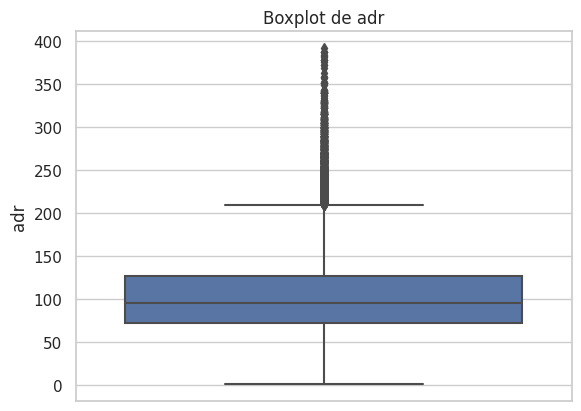

In [297]:
sns.boxplot(y=df_hotels.adr)
plt.title("Boxplot de adr")

##### Comparacion con el target

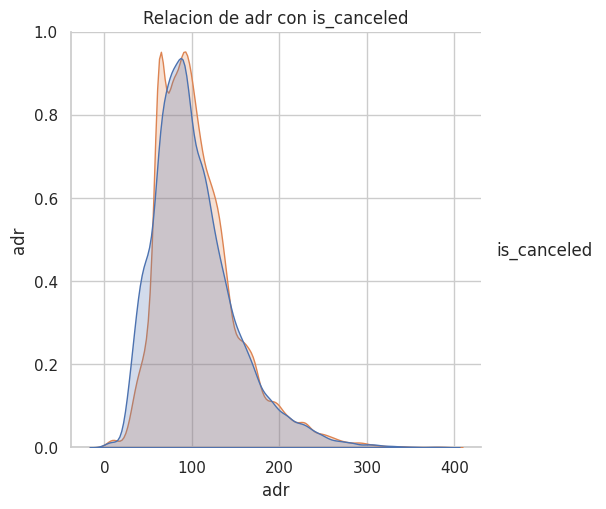

In [298]:
columna_a_comparar = ['adr', 'is_canceled']
sns.pairplot(data = df_hotels[columna_a_comparar], hue = 'is_canceled', height = 5). set(title = "Relacion de adr con is_canceled")

#### required_car_parking_spaces



##### Analisis Estadistico:

In [299]:
df_hotels.required_car_parking_spaces.describe()

count    60171.000000
mean         0.050273
std          0.221757
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: required_car_parking_spaces, dtype: float64

In [300]:
df_hotels.required_car_parking_spaces.value_counts().reset_index()

index  required_car_parking_spaces
0      0                        57167
1      1                         2990
2      2                           12
3      8                            1
4      3                            1

##### Valores Faltantes:

In [301]:
df_hotels.required_car_parking_spaces.isna().sum()

0

In [302]:
(df_hotels['required_car_parking_spaces'] >= 0).value_counts()

True    60171
Name: required_car_parking_spaces, dtype: int64

No hay valores faltantes en esta variables en el dataset.

##### Analisis Grafico:

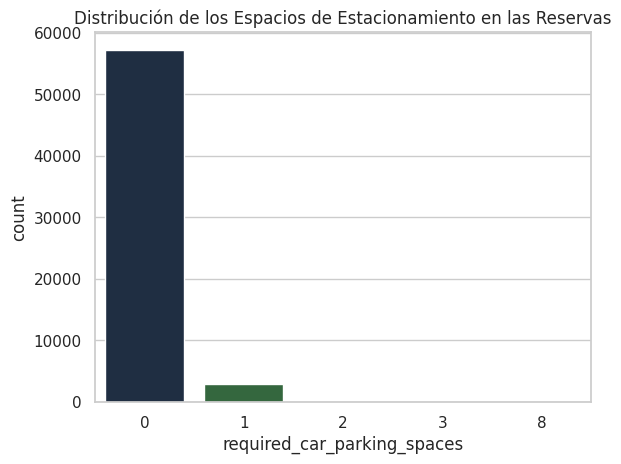

In [303]:
sns.countplot(x='required_car_parking_spaces', data = df_hotels, palette="cubehelix").set(title="Distribución de los Espacios de Estacionamiento en las Reservas")
sns.set_theme(style="whitegrid")
plt.show()

Text(0.5, 1.0, 'Boxplot de required_car_parking_spaces')

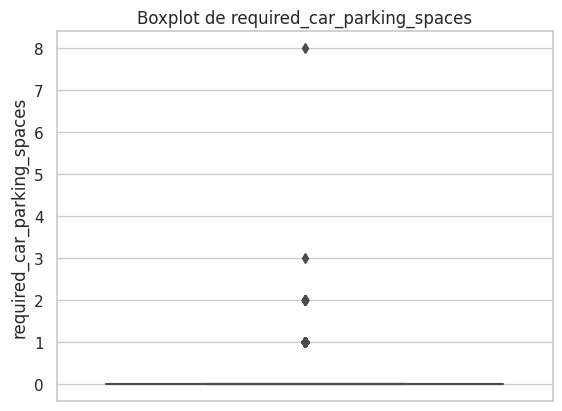

In [304]:
sns.boxplot(y=df_hotels.required_car_parking_spaces)
plt.title("Boxplot de required_car_parking_spaces")

In [305]:
df_hotels[df_hotels['required_car_parking_spaces'] > 1].shape

(14, 28)

In [306]:
columnas = df_hotels[df_hotels['required_car_parking_spaces'] > 1]
columnas.loc[:,['adults', 'required_car_parking_spaces']]


adults  required_car_parking_spaces
621         3                            2
2168        2                            2
8269        2                            8
9683        3                            2
11056       2                            2
11820       2                            2
13713       2                            3
14389       3                            2
22088       2                            2
38632       2                            2
42628       2                            2
51270       2                            2
53941       2                            2
55504       2                            2

Como vemos en el analisis anterior, hay dos valores atipicos:
+ required_car_parking_spaces: 8 ya que solo dos adultos hacen la reserva
+ required_car_parking_spaces: 3 ya que solo dos adultos hacen la reserva.

Consideramos que fueron valores mal cargados y reemplazamos esos numeros por la cantidad de adultos en esa reserva.

In [307]:
df_hotels.loc[(df_hotels['adults'] == 2) & (df_hotels['required_car_parking_spaces'] == 3), 'required_car_parking_spaces'] = 2


In [308]:
df_hotels.loc[(df_hotels['adults'] == 2) & (df_hotels['required_car_parking_spaces'] == 8), 'required_car_parking_spaces'] = 2

Text(0.5, 1.0, 'Boxplot de required_car_parking_spaces')

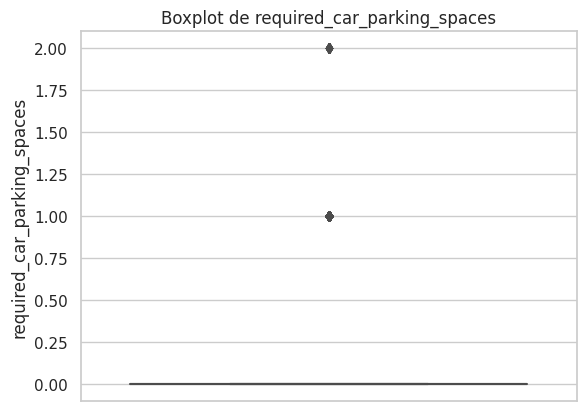

In [309]:
sns.boxplot(y=df_hotels.required_car_parking_spaces)
plt.title("Boxplot de required_car_parking_spaces")

#### total_of_special_requests

##### Analisis Estadistico:

In [310]:
df_hotels.total_of_special_requests.describe()

count    60171.000000
mean         0.525403
std          0.774682
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

In [311]:
df_hotels.total_of_special_requests.value_counts().reset_index()

index  total_of_special_requests
0      0                      37422
1      1                      15372
2      2                       6069
3      3                       1148
4      4                        140
5      5                         20

##### Valores Faltantes:

In [314]:
df_hotels.total_of_special_requests.isna().sum()

0

In [315]:
(df_hotels['total_of_special_requests'] >= 0).value_counts()

True    60171
Name: total_of_special_requests, dtype: int64

No hay valores faltantes de esta variable en el dataset.

##### Analisis Grafico:

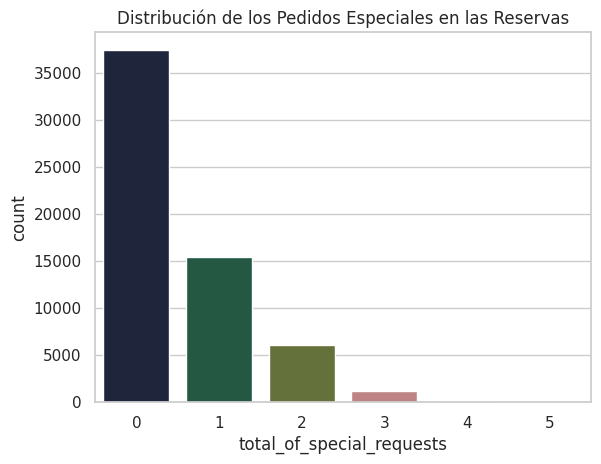

In [316]:
sns.countplot(x='total_of_special_requests', data = df_hotels, palette="cubehelix").set(title="Distribución de los Pedidos Especiales en las Reservas")
sns.set_theme(style="whitegrid")
plt.show()

Text(0.5, 1.0, 'Boxplot de total_special_request')

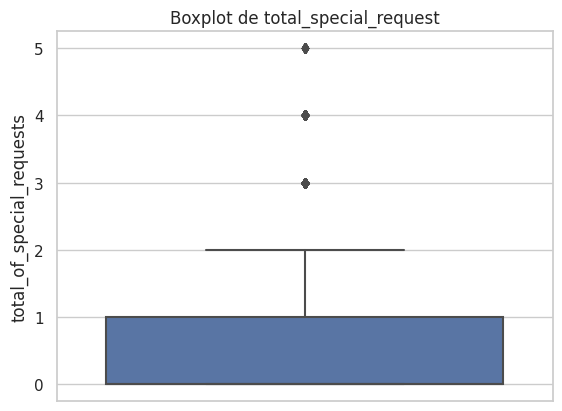

In [317]:
sns.boxplot(y=df_hotels.total_of_special_requests)
plt.title("Boxplot de total_special_request")

##### Outliers:

In [318]:
df_hotels[df_hotels['total_of_special_requests'] >= 4].shape

(160, 28)

Como son 164 registros, podemos reemplazar con el valor más frecuente:

In [319]:
df_hotels.loc[(df_hotels['total_of_special_requests'] >= 4), 'total_of_special_requests'] = 1


In [320]:
df_hotels.total_of_special_requests.value_counts().reset_index()

index  total_of_special_requests
0      0                      37422
1      1                      15532
2      2                       6069
3      3                       1148

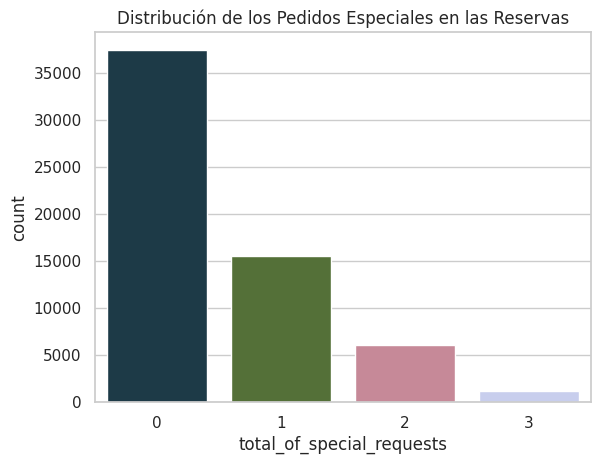

In [321]:
sns.countplot(x='total_of_special_requests', data = df_hotels, palette="cubehelix").set(title="Distribución de los Pedidos Especiales en las Reservas")
sns.set_theme(style="whitegrid")
plt.show()

Text(0.5, 1.0, 'Boxplot de total_special_request')

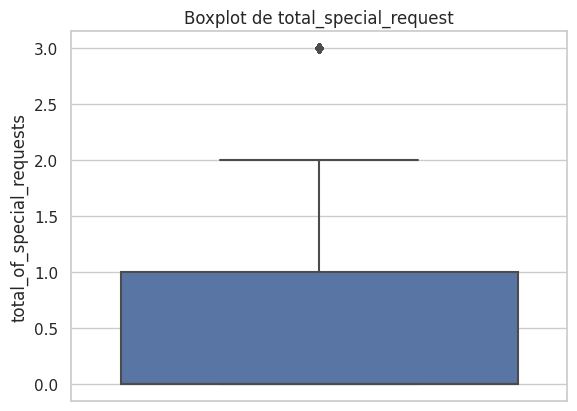

In [322]:
sns.boxplot(y=df_hotels.total_of_special_requests)
plt.title("Boxplot de total_special_request")

### <u>Conclusiones del analisis Univariado:</u>

Veamos como se encuentra nuestro dataset despues de realizar la limpieza de datos faltantes/anomalos.





In [323]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60171 entries, 0 to 61912
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        60171 non-null  object 
 1   lead_time                    60171 non-null  int64  
 2   arrival_date_year            60171 non-null  int64  
 3   arrival_date_month           60171 non-null  object 
 4   arrival_date_week_number     60171 non-null  int64  
 5   arrival_date_day_of_month    60171 non-null  int64  
 6   stays_in_weekend_nights      60171 non-null  int64  
 7   stays_in_week_nights         60171 non-null  int64  
 8   adults                       60171 non-null  int64  
 9   children                     60171 non-null  float64
 10  babies                       60171 non-null  int64  
 11  meal                         60171 non-null  object 
 12  country                      60171 non-null  object 
 13  market_segment  

In [324]:
cantidad_de_reservas_actuales = df_hotels.shape[0]
cantidad_de_reservas_originales = ds_hotel_original.shape[0]
print(f"Redujimos la cantidad de reservas respecto a la cantidad original en un: {100 - (cantidad_de_reservas_actuales/cantidad_de_reservas_originales*100)}%")

Redujimos la cantidad de reservas respecto a la cantidad original en un: 2.8136255713662734%


In [325]:
cantidad_de_variables_actuales = df_hotels.shape[1]
cantidad_de_variables_originales = ds_hotel_original.shape[1]
print(f"Redujimos la cantidad de variables respecto a la cantidad original en un: {100 - (cantidad_de_variables_actuales/cantidad_de_variables_originales*100)}%")

Redujimos la cantidad de variables respecto a la cantidad original en un: 9.677419354838719%


## Analisis Multivariado:

### Correlacion entre Variables:

Para medir el nivel de correlacion entre las variables se utilizo el coeficiente de pearson y lo muestro a traves de un grafico heatmap.

<Axes: >

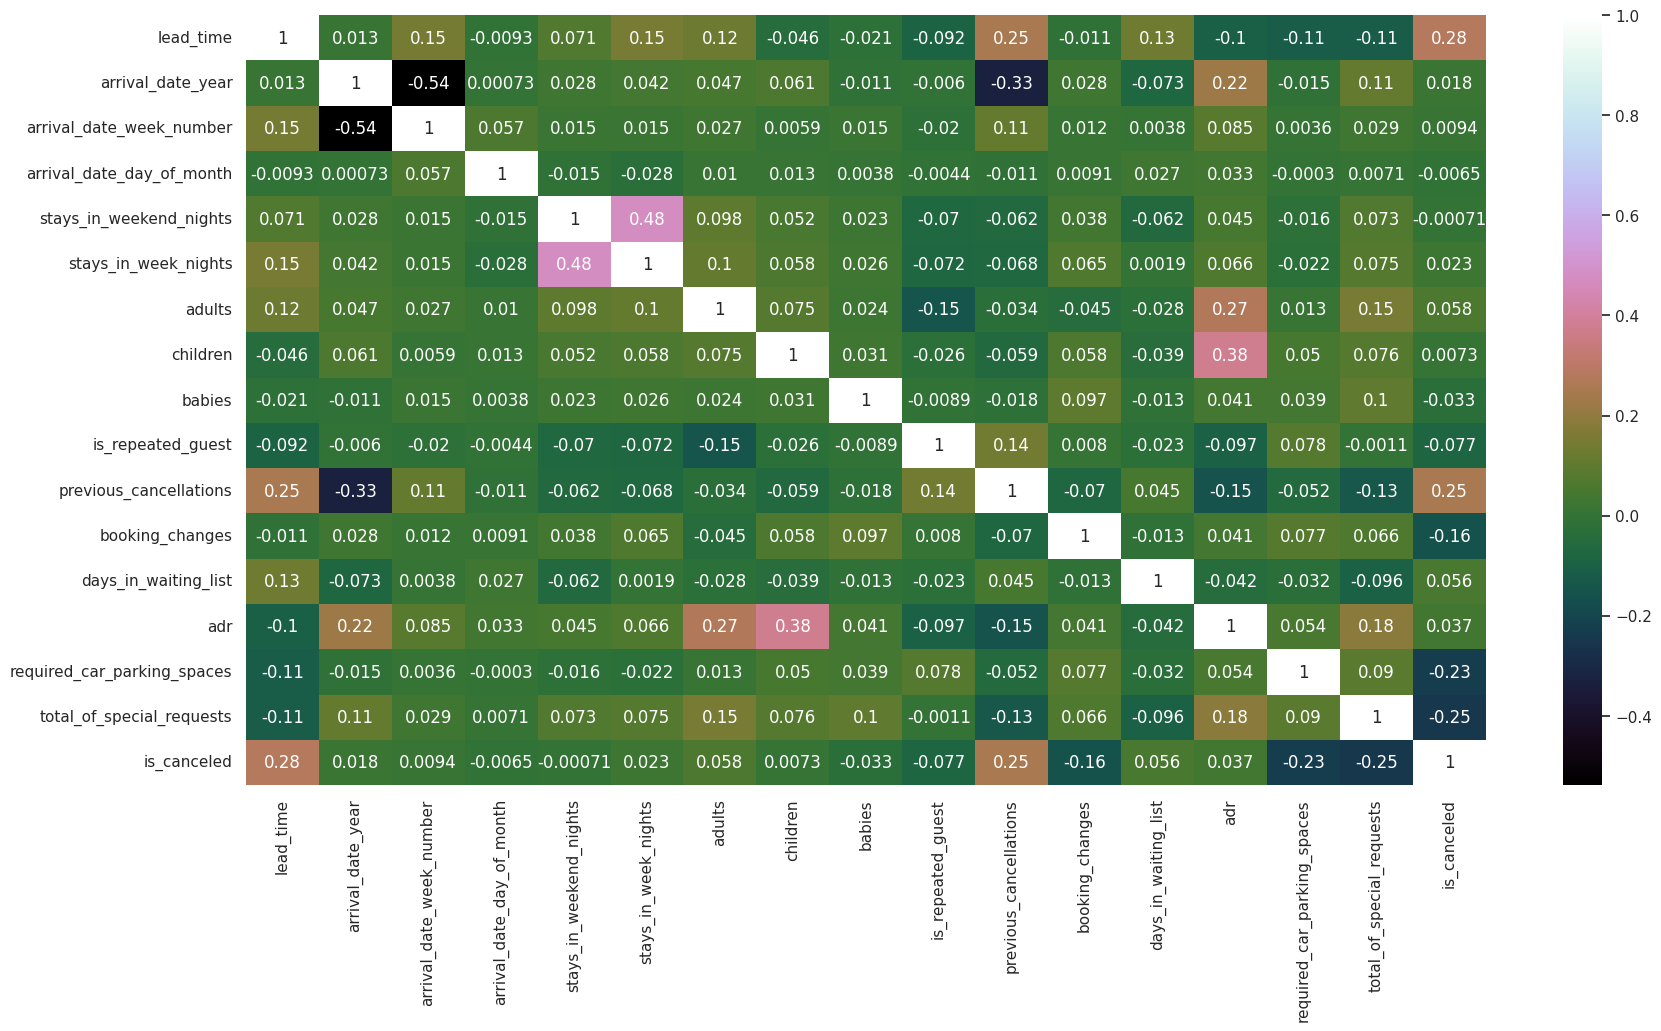

In [326]:
matriz = df_hotels.corr()
plt.figure(figsize =(20,10))
sns.heatmap(matriz, annot = True, cmap ='cubehelix')


El grafico heatmap nos muestra que algunas variables tienen correlacion entre ellas.
+ lead_time y is_cancelled: 0.28
+ lead_time y days_in_waiting_list: 0.13
+ previous_cancellation y lead_time: 0.25
+ stays_in_week_nights y lead_time: 0.15
+ arrival_date_week_number y lead_time: 0.15
+ arrival_date_year y adr. 0.22
+ previous_cancellations y arrival_date_year: -0.33 (Es una correlaion negativa)
+ arrival_date_year y arrival_date_week_number: -0.54 (Es una correlacion negativa)
+ stays_in_week_nights y stays_in_weekend_nights: 0.48
+ total_special_requests y adults: 0.15
+ adr y adults : 0.27
+ children y adr : 0.38
+ previous_cancellation y is_canceled: 0.25
+ total_special_requests y adr: 0.18
+ is_canceled y required_car_parking_spaces: -0.23 (Es una correlaion negativa)
+ is_canceled y total_of_special_requests: -0.25 (Es una correlaion negativa)




Veamos los gráficos de dispersion entre esas variables:

#### lead_time y is_cancelled

[Text(0.5, 1.0, 'Grafico de Dispersion de lead_time y is_canceled')]

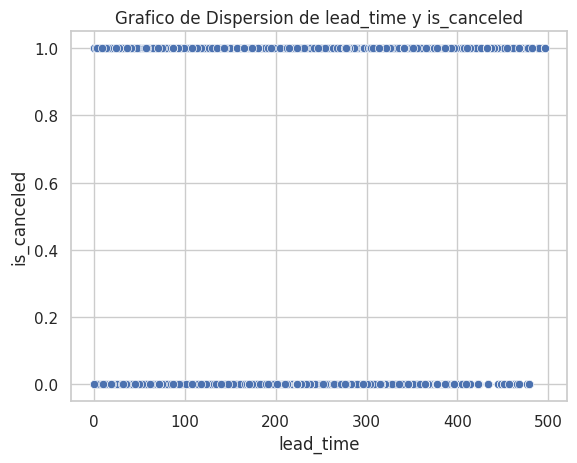

In [327]:
sns.scatterplot(x=df_hotels['lead_time'], y = df_hotels['is_canceled']).set(title='Grafico de Dispersion de lead_time y is_canceled')

<Axes: xlabel='lead_time', ylabel='Density'>

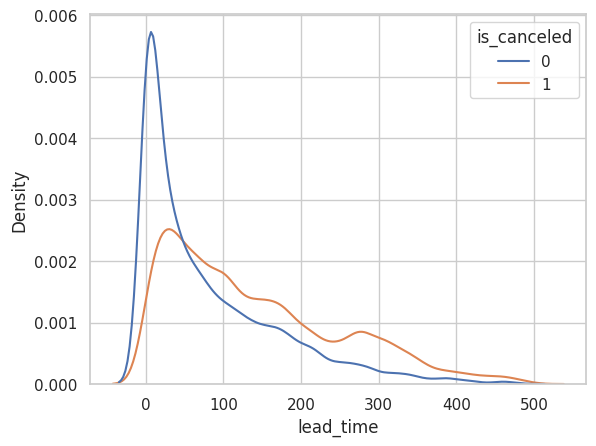

In [328]:
sns.kdeplot(data=df_hotels, x='lead_time', hue ='is_canceled')

Como se observa en el gráfico, al tener poco tiempo de espera no hay muchas cancelaciones y a medida que aumenta ese tiempo de espera, aumentan las cancelaciones.

#### lead_time y days_in_waiting_list

[Text(0.5, 1.0, 'Grafico de Dispersion de lead_time y days_in_waiting_list')]

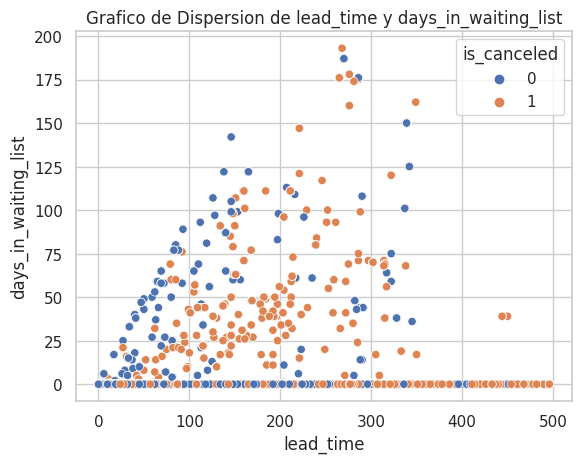

In [329]:
sns.scatterplot(x=df_hotels['lead_time'], y = df_hotels['days_in_waiting_list'], hue= df_hotels['is_canceled']).set(title='Grafico de Dispersion de lead_time y days_in_waiting_list')

A mayor tiempo de espera entre la reserva y el momento de llegada al hotel, hay mayor probabilidad de cancelaciones

#### previous_cancellation y lead_time

[Text(0.5, 1.0, 'Grafico de Dispersion de lead_time y previous_cancellations')]

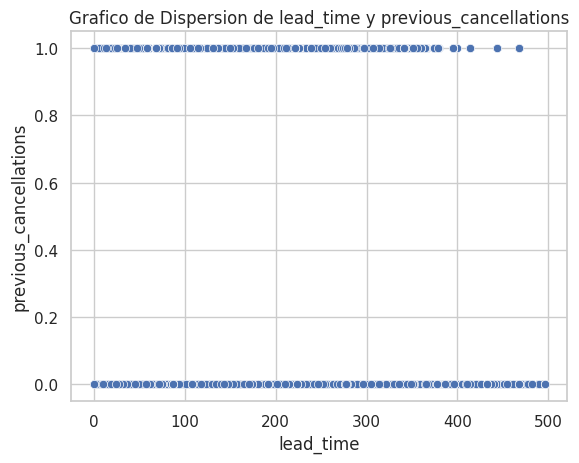

In [330]:
sns.scatterplot(x=df_hotels['lead_time'], y = df_hotels['previous_cancellations']).set(title='Grafico de Dispersion de lead_time y previous_cancellations')

<Axes: xlabel='lead_time', ylabel='Density'>

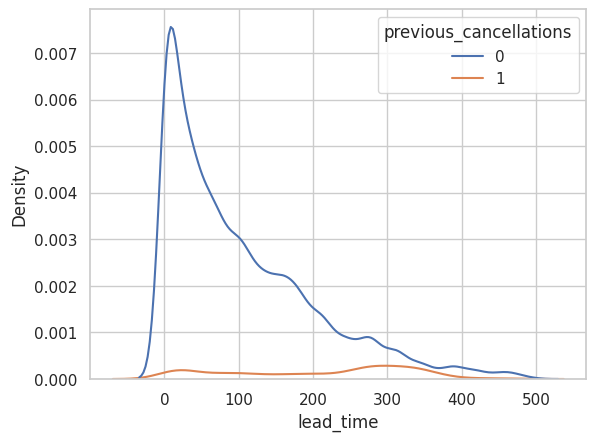

In [331]:
sns.kdeplot(data=df_hotels, x='lead_time', hue ='previous_cancellations')

Mientras menos tiempo de espwera para la reserva, menos previas cancelaciones tendra el modelo.

#### stays_in_week_nights y lead_time

[Text(0.5, 1.0, 'Grafico de Dispersion de lead_time y stays_in_week_nights')]

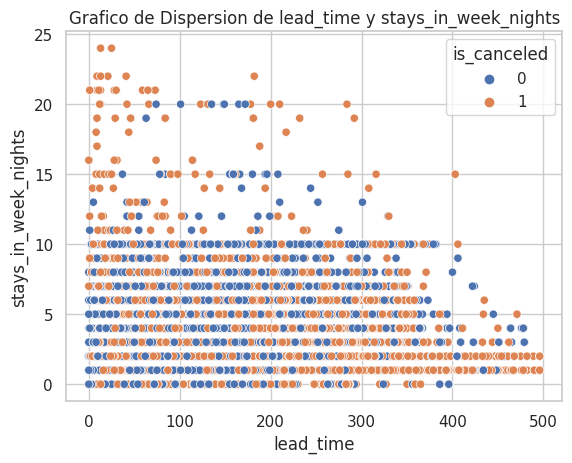

In [332]:
sns.scatterplot(x=df_hotels['lead_time'], y = df_hotels['stays_in_week_nights'], hue= df_hotels.is_canceled).set(title='Grafico de Dispersion de lead_time y stays_in_week_nights')

El valor de la correlacion ya era bajo y al graficar, verificamos que no hay mucha correlacion.

#### arrival_date_week_number y lead_time

[Text(0.5, 1.0, 'Grafico de Dispersion de lead_time y arrival_date_week_number')]

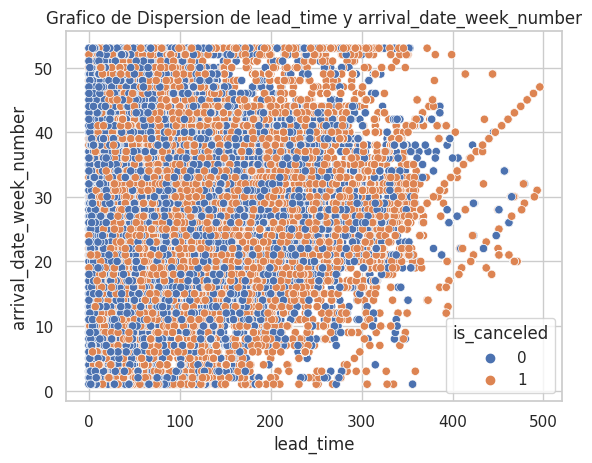

In [333]:
sns.scatterplot(x=df_hotels['lead_time'], y = df_hotels['arrival_date_week_number'], hue = df_hotels['is_canceled']).set(title='Grafico de Dispersion de lead_time y arrival_date_week_number')

La correlacion que tienen estas dos variables con nuestro target es de 0.15, el cual ya es muy bajo y no encontramos una correlacion.

### arrival_date_year y adr

[Text(0.5, 1.0, 'Grafico de Dispersion de arrival_date_year y adr')]

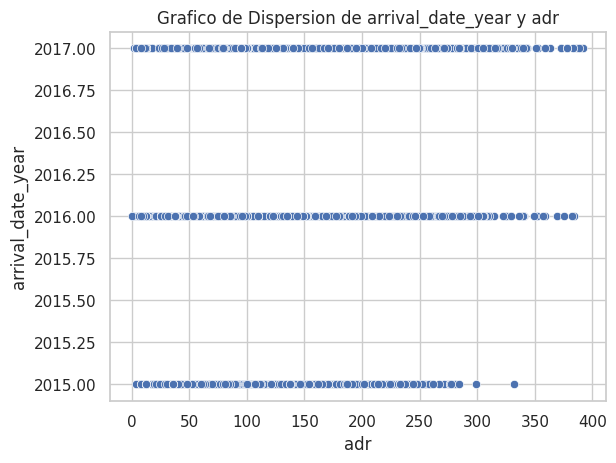

In [334]:
sns.scatterplot(y=df_hotels['arrival_date_year'], x = df_hotels['adr']).set(title='Grafico de Dispersion de arrival_date_year y adr')

A medida que el tiempo avanza en terminos de años, la ganancia aumenta

#### previous_cancellations y arrival_date_year

[Text(0.5, 1.0, 'Grafico de Dispersion de arrival_date_year y previous_cancellations')]

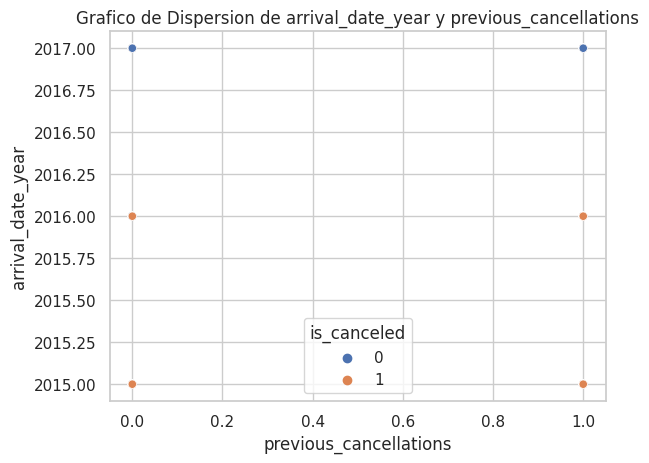

In [335]:
sns.scatterplot(y=df_hotels['arrival_date_year'], x = df_hotels['previous_cancellations'], hue = df_hotels['is_canceled']).set(title='Grafico de Dispersion de arrival_date_year y previous_cancellations')

<Axes: xlabel='arrival_date_year', ylabel='Density'>

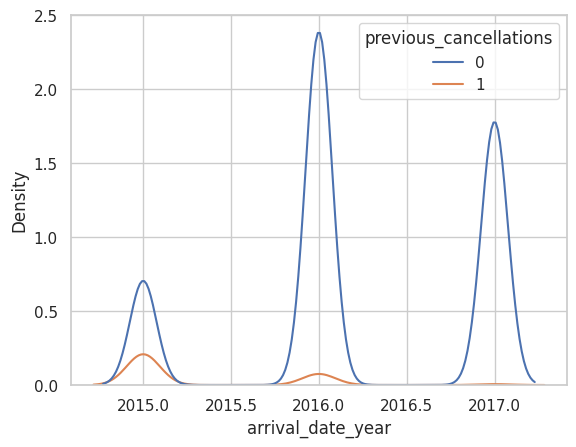

In [336]:
sns.kdeplot(data=df_hotels, x='arrival_date_year', hue ='previous_cancellations')

A medida que pasan los años, las cancelaciones previas van disminuyendo.

#### arrival_date_year y arrival_date_week_number

[Text(0.5, 1.0, 'Grafico de Dispersion de arrival_date_year y arrival_date_week_number')]

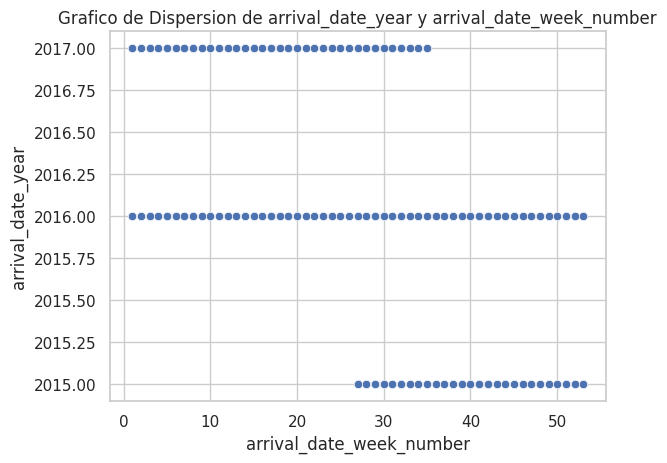

In [337]:
sns.scatterplot(y=df_hotels['arrival_date_year'], x = df_hotels['arrival_date_week_number']).set(title='Grafico de Dispersion de arrival_date_year y arrival_date_week_number')

<Axes: xlabel='arrival_date_week_number', ylabel='Density'>

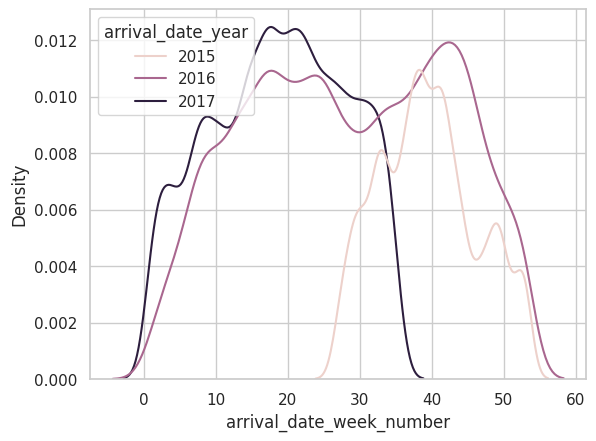

In [338]:
sns.kdeplot(data=df_hotels, x='arrival_date_week_number', hue ='arrival_date_year')

Analizamos, que en en el 2015 las reservas fueron durante el final del año. En cambio en el 2016 fueron durante todo el año con reservas constantes. En el año 2017, solamente hubo reservas en el principio de año (esto puede ser que los datos hayan llegado solo hasta mitad de año)

#### stays_in_week_nights y stays_in_weekend_nights

[Text(0.5, 1.0, 'Grafico de Dispersion de stays_in_week_nights y stays_in_weekend_nights')]

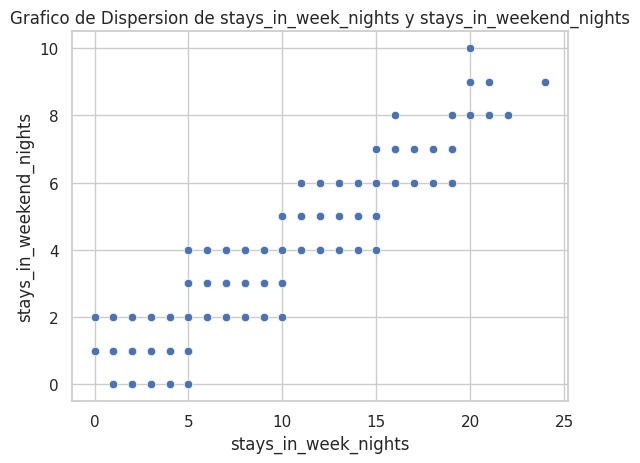

In [339]:
sns.scatterplot(x=df_hotels['stays_in_week_nights'], y = df_hotels['stays_in_weekend_nights']).set(title='Grafico de Dispersion de stays_in_week_nights y stays_in_weekend_nights')

En esta grafico tenemos una correlacion lineal mas fuerte como fue demostrado en el heatmap. A medida que aumentan la cantidad de noches de la semana, aumentan la cantidad de noches en el fin de semana.

#### total_of_special_requests y adults

[Text(0.5, 1.0, 'Grafico de Dispersion de adults y total_of_special_requests')]

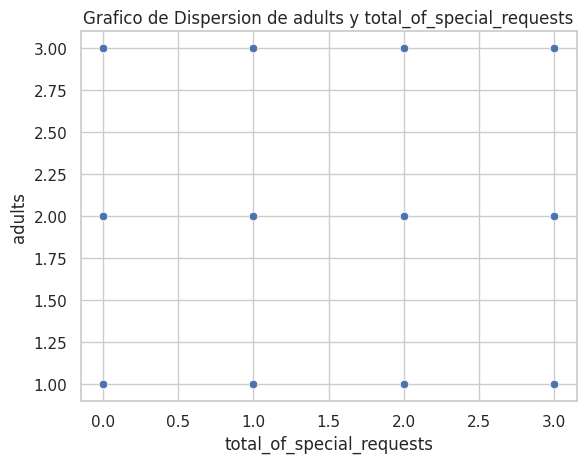

In [340]:
sns.scatterplot(x=df_hotels['total_of_special_requests'], y = df_hotels['adults']).set(title='Grafico de Dispersion de adults y total_of_special_requests')

<Axes: xlabel='total_of_special_requests', ylabel='Density'>

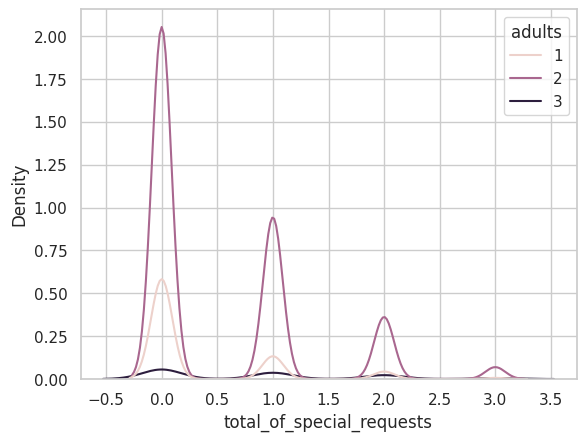

In [341]:
sns.kdeplot(data=df_hotels, x='total_of_special_requests', hue ='adults')

Cuando hay reservas con dos adultos, tienen mas pedidos especiales que cuando es una reserva de una o tres personas.

#### adr y adults

[Text(0.5, 1.0, 'Grafico de Dispersion de adr y adults')]

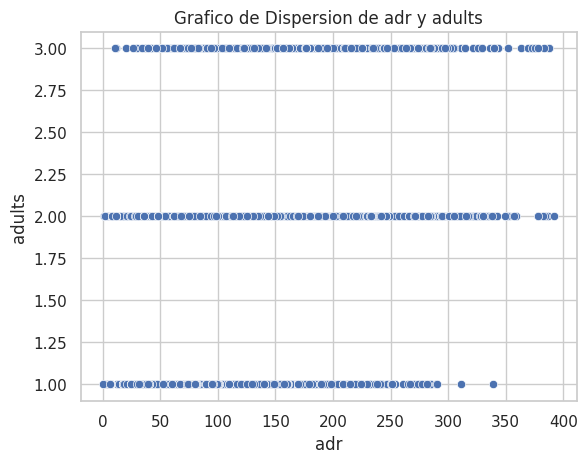

In [342]:
sns.scatterplot(x=df_hotels['adr'], y = df_hotels['adults']).set(title='Grafico de Dispersion de adr y adults')

A medida que aumentan la cantidad de adultos en la reserva, aumenta el promedio de ganancia por habiatcion.

#### children y adr

[Text(0.5, 1.0, 'Grafico de Dispersion de adr y children')]

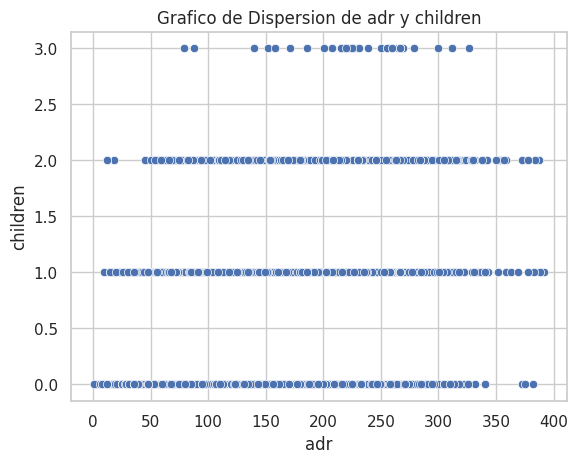

In [343]:
sns.scatterplot(x=df_hotels['adr'], y = df_hotels['children']).set(title='Grafico de Dispersion de adr y children')

Hay mas ganancia cuando las reservas son hechas hasta dos niños. En cambio cuando hay mas de dos niños, las ganacias ddisminuyen, esto se debe a que la cantidad de reservas dismuyen en este caso.

#### previous_cancellation y is_canceled

[Text(0.5, 1.0, 'Grafico de Dispersion de previous_cancellations y is_canceled')]

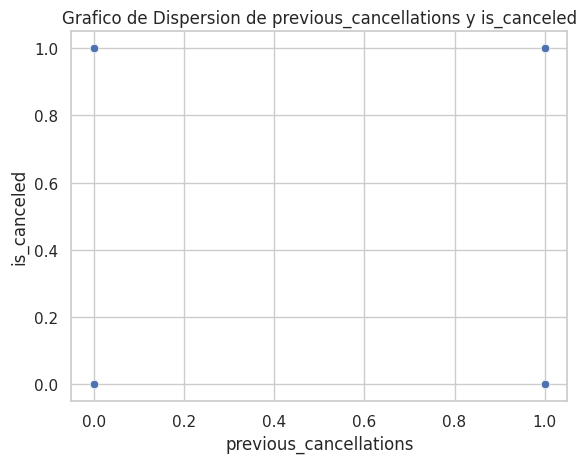

In [344]:
sns.scatterplot(x=df_hotels['previous_cancellations'], y = df_hotels['is_canceled']).set(title='Grafico de Dispersion de previous_cancellations y is_canceled')

<Axes: xlabel='is_canceled', ylabel='Density'>

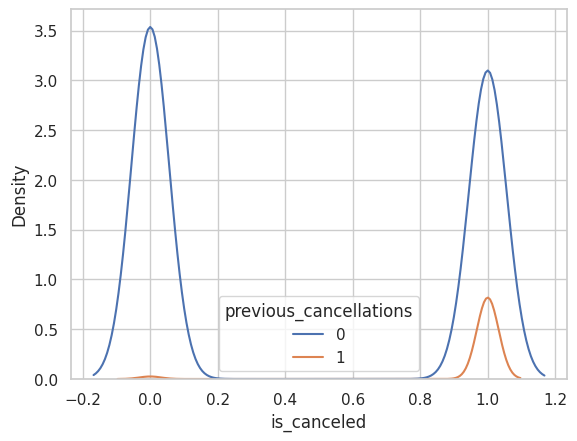

In [345]:
sns.kdeplot(data=df_hotels, x='is_canceled', hue ='previous_cancellations')

Mientras mayor cancelaciones previas haya, mayor probabilidad que se cancele la reserva.

#### total_special_requests y adr

[Text(0.5, 1.0, 'Grafico de Dispersion de total_of_specials_requests y adr')]

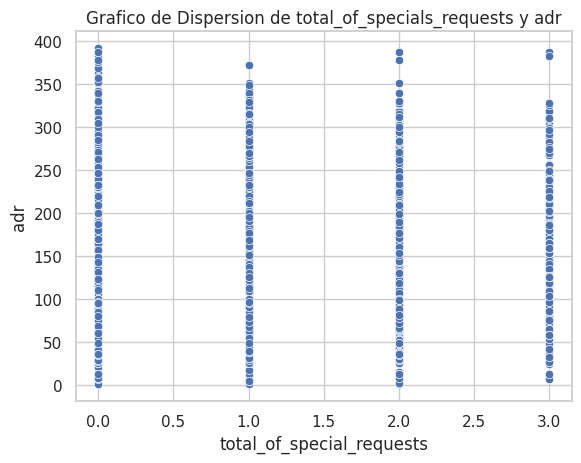

In [346]:
sns.scatterplot(x=df_hotels['total_of_special_requests'], y = df_hotels['adr']).set(title='Grafico de Dispersion de total_of_specials_requests y adr')

La ganacia es constante a medida que aumenta la cantidad de pedidos especiales.

#### is_canceled y required_car_parking_spaces

[Text(0.5, 1.0, 'Grafico de Dispersion de is_canceled y required_car_parking_spaces')]

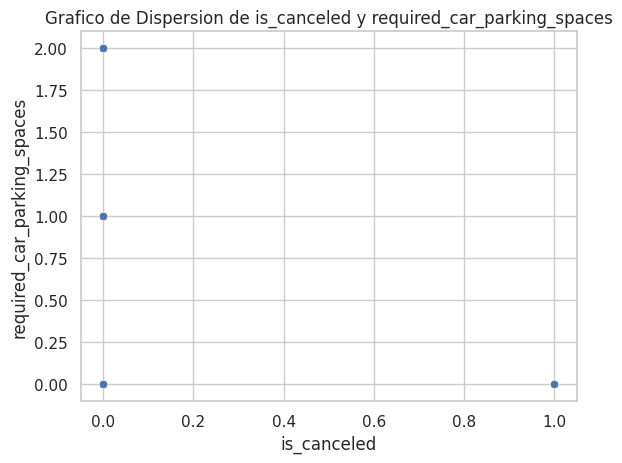

In [347]:
sns.scatterplot(x=df_hotels['is_canceled'], y = df_hotels['required_car_parking_spaces']).set(title='Grafico de Dispersion de is_canceled y required_car_parking_spaces')

<ipython-input-348-6265ccc58106>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_hotels, x='required_car_parking_spaces', hue ='is_canceled')


<Axes: xlabel='required_car_parking_spaces', ylabel='Density'>

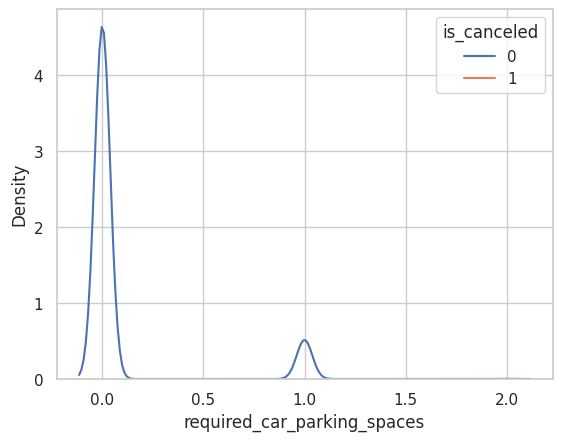

In [348]:
sns.kdeplot(data=df_hotels, x='required_car_parking_spaces', hue ='is_canceled')

No hay informacion suficiente para determinar que hay una correlacion entre estas variables.

#### is_canceled y total_of_special_requests

[Text(0.5, 1.0, 'Grafico de Dispersion de is_canceled y total_of_special_request')]

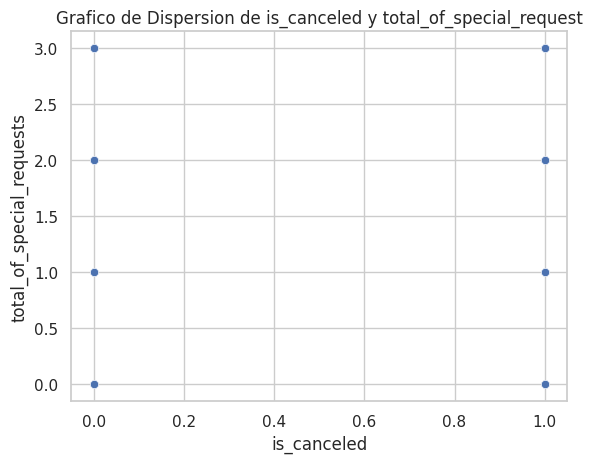

In [349]:
sns.scatterplot(x=df_hotels['is_canceled'], y = df_hotels['total_of_special_requests']).set(title='Grafico de Dispersion de is_canceled y total_of_special_request')

<Axes: xlabel='total_of_special_requests', ylabel='Density'>

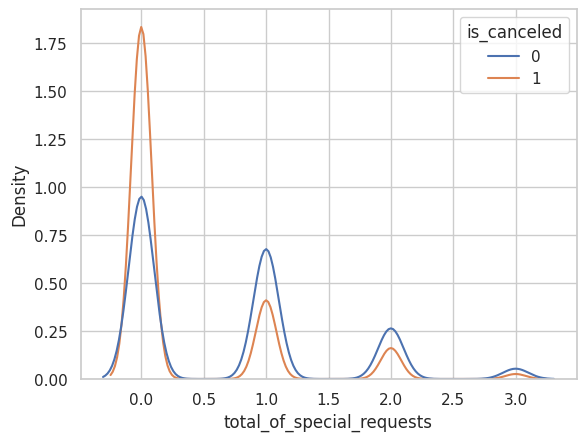

In [350]:
sns.kdeplot(data=df_hotels, x='total_of_special_requests', hue ='is_canceled')

A menor cantidad de pedidos especiales, hay mas probabilidad que la reserva se cancele.

### Grafico de pairplot:

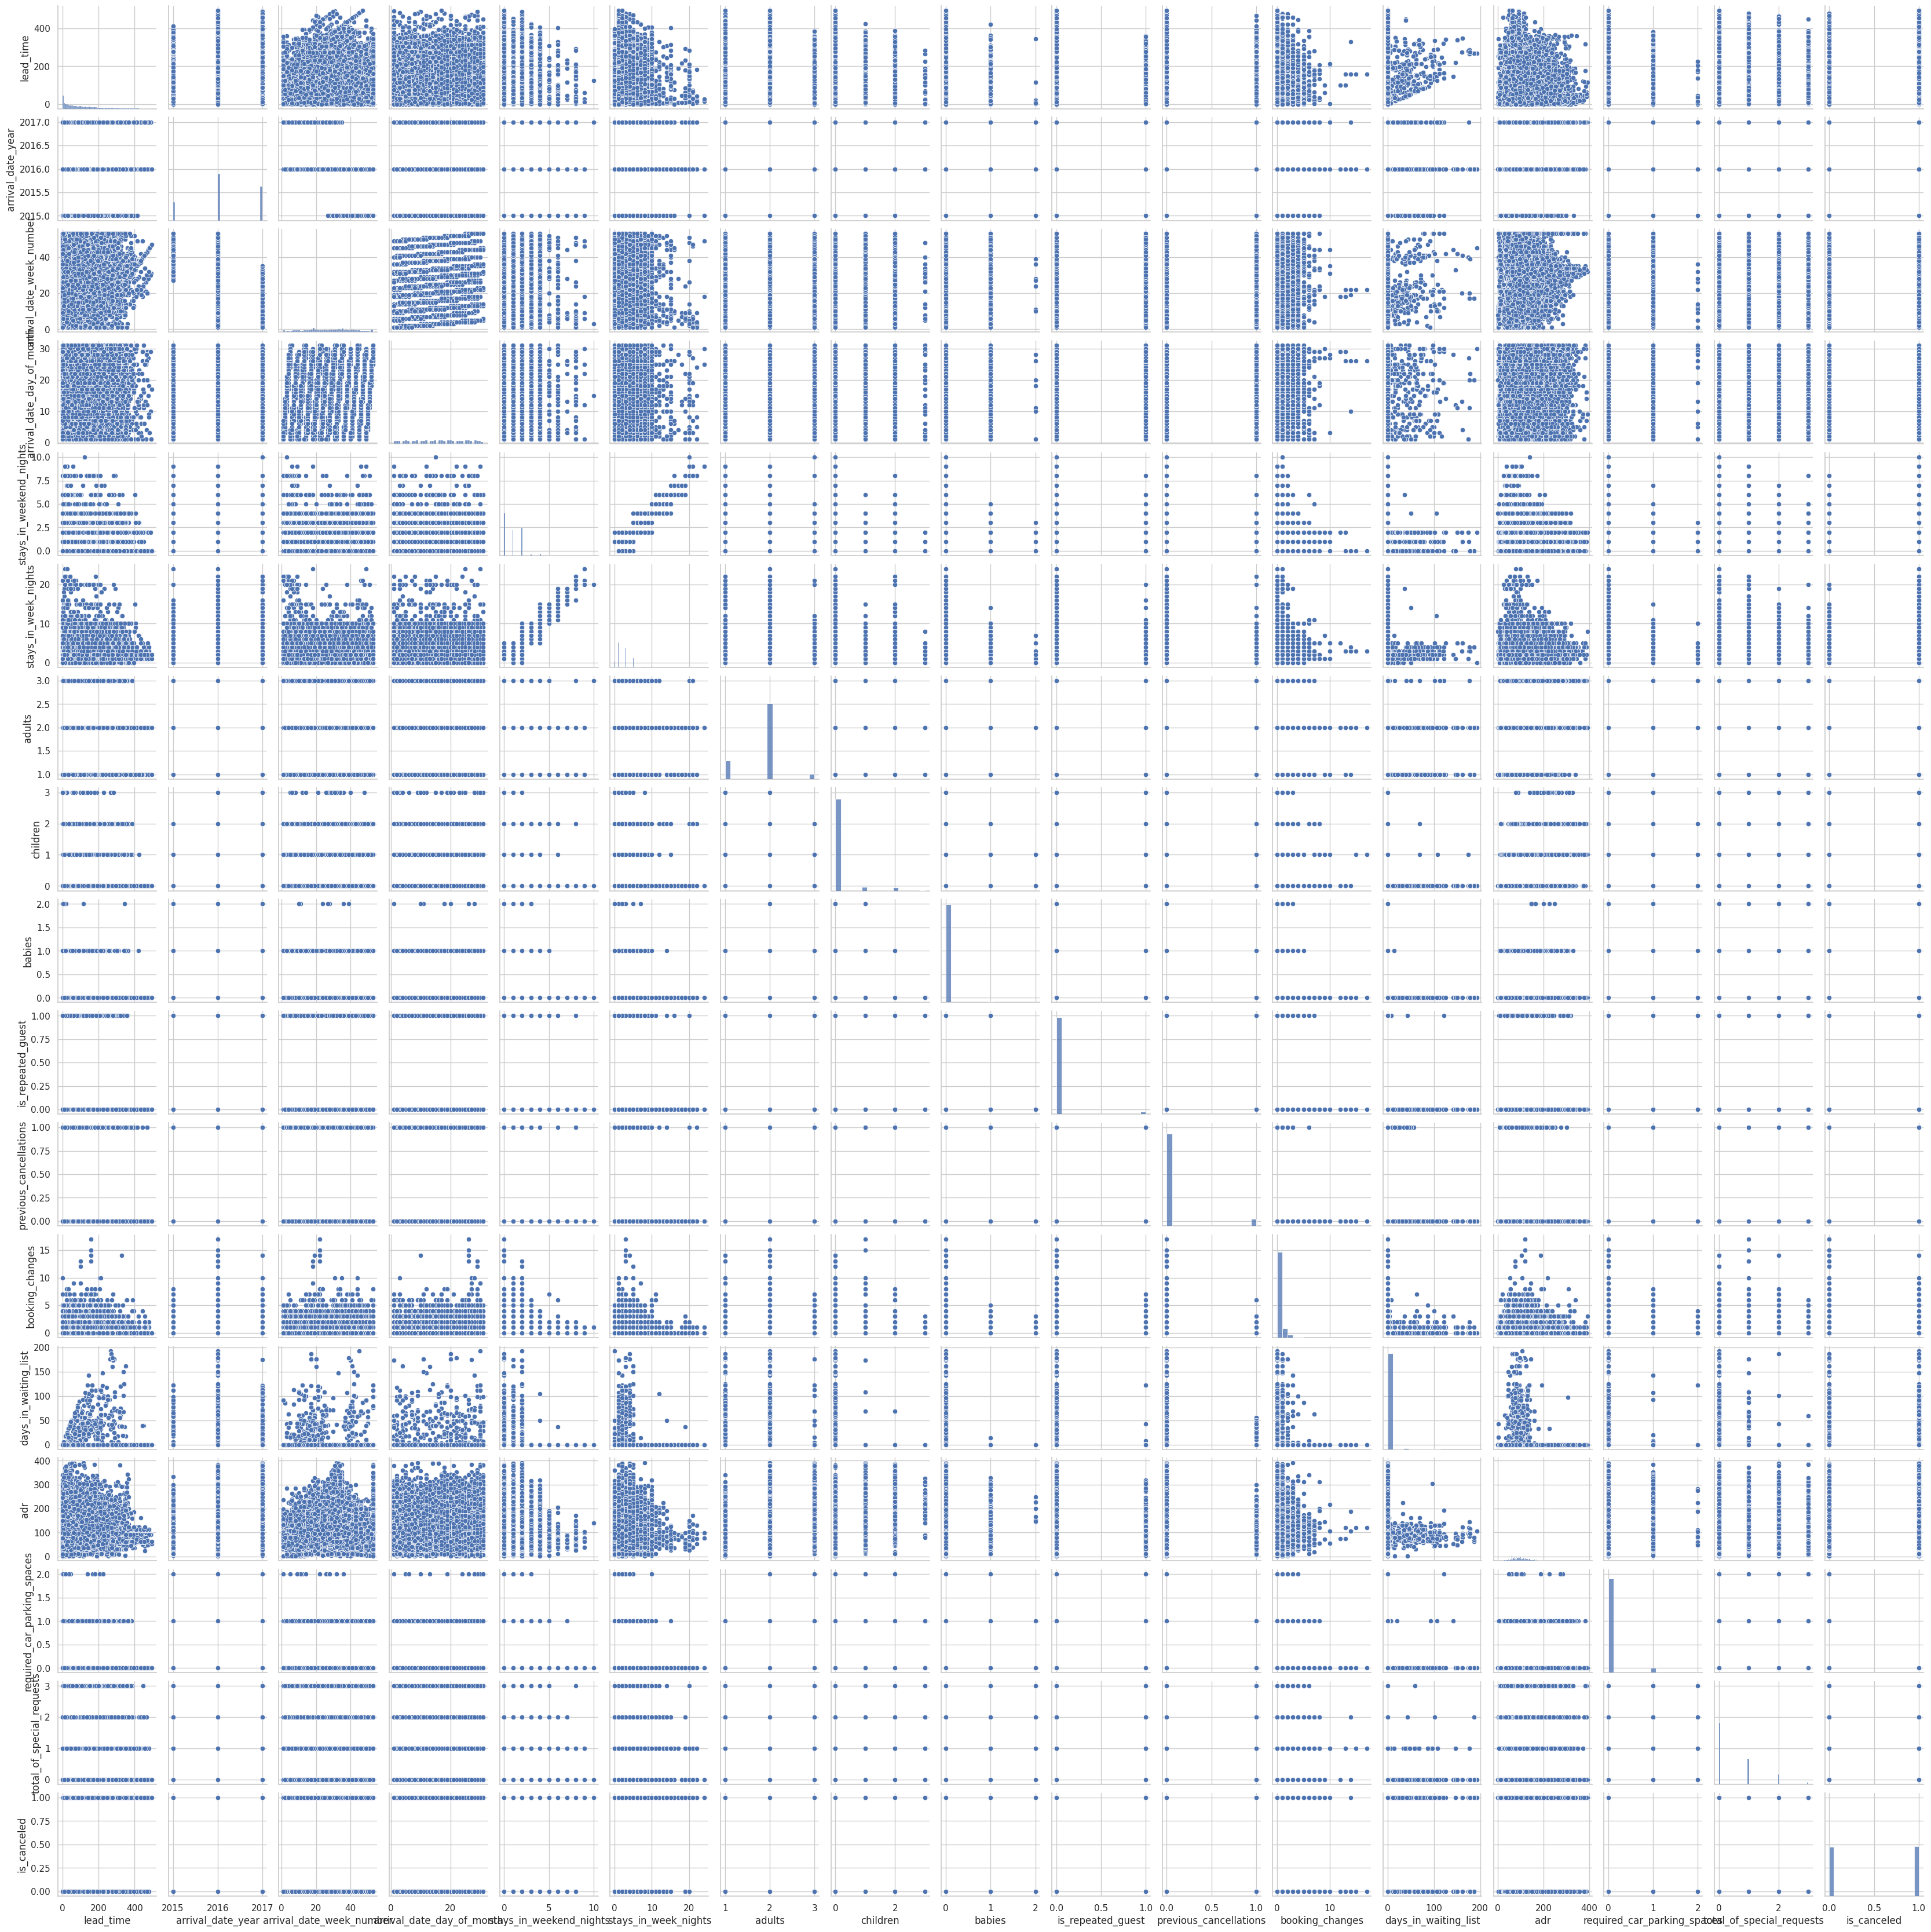

In [ ]:
sns.pairplot(df_hotels, height = 2)

Concluimos que el target si tiene correlacion directa con varias variables pero entre las demas variables no hay tanta correlacion directa. Esto se puede observar en los graficos de dispersion.